In [1]:
import os, sys
import iris
import iris.coord_categorisation
import matplotlib.pyplot as plt
import iris.plot as iplt
import numpy as np
import pandas as pd
import seaborn as sns
# sns.set(style="darkgrid")
import xarray as xr
import cartopy.crs as ccrs
import cmocean

cwd = os.getcwd()
repo_dir = '/'
for directory in cwd.split('/')[1:]:
    repo_dir = os.path.join(repo_dir, directory)
    if directory == 'ocean-analysis':
        break

modules_dir = os.path.join(repo_dir, 'modules')
sys.path.append(modules_dir)
try:
    import general_io as gio
except ImportError:
    raise ImportError('Must run this script from anywhere within the ocean-analysis git repo')


/g/data/r87/dbi599/miniconda3/envs/ocean/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/g/data/r87/dbi599/miniconda3/envs/ocean/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/g/data/r87/dbi599/miniconda3/envs/ocean/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/g/data/r87/dbi599/miniconda3/envs/ocean/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/g/data/r87/dbi599/miniconda3/envs/ocean/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. E

In [2]:
# historical, historicalGHG, historicalMisc

#zonal_dict = {}
region_dict = {}

## CMIP6

#zonal_dict['BCC-CSM2-MR'] = ['/g/data/r87/dbi599/CMIP6/CMIP/BCC/BCC-CSM2-MR/historical/r1i1p1f1/Ayr/pe/gn/v20181126/pe-zonal-region-sum-anomaly_Ayr_BCC-CSM2-MR_historical_r1i1p1f1_gn_185001-201412-cumsum.nc',
#                             '/g/data/r87/dbi599/CMIP6/DAMIP/BCC/BCC-CSM2-MR/hist-GHG/r1i1p1f1/Ayr/pe/gn/v20190426/pe-zonal-region-sum-anomaly_Ayr_BCC-CSM2-MR_hist-GHG_r1i1p1f1_gn_185001-202012-cumsum.nc',
#                             '/g/data/r87/dbi599/CMIP6/DAMIP/BCC/BCC-CSM2-MR/hist-aer/r1i1p1f1/Ayr/pe/gn/v20190507/pe-zonal-region-sum-anomaly_Ayr_BCC-CSM2-MR_hist-aer_r1i1p1f1_gn_185001-202012-cumsum.nc']
region_dict['BCC-CSM2-MR'] = ['/g/data/r87/dbi599/CMIP6/CMIP/BCC/BCC-CSM2-MR/historical/r1i1p1f1/Ayr/pe/gn/v20181126/pe-region-sum-anomaly_Ayr_BCC-CSM2-MR_historical_r1i1p1f1_gn_185001-201412-cumsum.nc',
                              '/g/data/r87/dbi599/CMIP6/DAMIP/BCC/BCC-CSM2-MR/hist-GHG/r1i1p1f1/Ayr/pe/gn/v20190426/pe-region-sum-anomaly_Ayr_BCC-CSM2-MR_hist-GHG_r1i1p1f1_gn_185001-201412-cumsum.nc',
                              '/g/data/r87/dbi599/CMIP6/DAMIP/BCC/BCC-CSM2-MR/hist-aer/r1i1p1f1/Ayr/pe/gn/v20190507/pe-region-sum-anomaly_Ayr_BCC-CSM2-MR_hist-aer_r1i1p1f1_gn_185001-201412-cumsum.nc']

region_dict['CanESM5'] = ['/g/data/r87/dbi599/CMIP6/CMIP/CCCma/CanESM5/historical/r1i1p1f1/Ayr/pe/gn/v20190429/pe-region-sum-anomaly_Ayr_CanESM5_historical_r1i1p1f1_gn_185001-201412-cumsum.nc',
                          '/g/data/r87/dbi599/CMIP6/DAMIP/CCCma/CanESM5/hist-GHG/r10i1p1f1/Ayr/pe/gn/v20190429/pe-region-sum-anomaly_Ayr_CanESM5_hist-GHG_r10i1p1f1_gn_185001-201412-cumsum.nc',
                          '/g/data/r87/dbi599/CMIP6/DAMIP/CCCma/CanESM5/hist-aer/r1i1p1f1/Ayr/pe/gn/v20190429/pe-region-sum-anomaly_Ayr_CanESM5_hist-aer_r1i1p1f1_gn_185001-201412-cumsum.nc']

# CNRM-CERFACS: Missing evspsbl control files (the first file): /g/data/oi10/replicas/CMIP6/CMIP/CNRM-CERFACS/CNRM-CM6-1/piControl/r1i1p1f2/Amon/evspsbl/gr/v20180814/

# FGOALS-g3: years missing in hist-aer and hist-GHG data

#zonal_dict['IPSL-CM6A-LR'] = ['/g/data/r87/dbi599/CMIP6/CMIP/IPSL/IPSL-CM6A-LR/historical/r1i1p1f1/Ayr/pe/gr/v20180803/pe-zonal-region-sum-anomaly_Ayr_IPSL-CM6A-LR_historical_r1i1p1f1_gr_185001-201412-cumsum.nc',
#                               '/g/data/r87/dbi599/CMIP6/DAMIP/IPSL/IPSL-CM6A-LR/hist-GHG/r1i1p1f1/Ayr/pe/gr/v20180914/pe-zonal-region-sum-anomaly_Ayr_IPSL-CM6A-LR_hist-GHG_r1i1p1f1_gr_185001-202012-cumsum.nc',
#                               '/g/data/r87/dbi599/CMIP6/DAMIP/IPSL/IPSL-CM6A-LR/hist-aer/r1i1p1f1/Ayr/pe/gr/v20180914/pe-zonal-region-sum-anomaly_Ayr_IPSL-CM6A-LR_hist-aer_r1i1p1f1_gr_185001-202012-cumsum.nc']
region_dict['IPSL-CM6A-LR'] = ['/g/data/r87/dbi599/CMIP6/CMIP/IPSL/IPSL-CM6A-LR/historical/r1i1p1f1/Ayr/pe/gr/v20180803/pe-region-sum-anomaly_Ayr_IPSL-CM6A-LR_historical_r1i1p1f1_gr_185001-201412-cumsum.nc',
                               '/g/data/r87/dbi599/CMIP6/DAMIP/IPSL/IPSL-CM6A-LR/hist-GHG/r1i1p1f1/Ayr/pe/gr/v20180914/pe-region-sum-anomaly_Ayr_IPSL-CM6A-LR_hist-GHG_r1i1p1f1_gr_185001-201412-cumsum.nc',
                               '/g/data/r87/dbi599/CMIP6/DAMIP/IPSL/IPSL-CM6A-LR/hist-aer/r1i1p1f1/Ayr/pe/gr/v20180914/pe-region-sum-anomaly_Ayr_IPSL-CM6A-LR_hist-aer_r1i1p1f1_gr_185001-202012-cumsum.nc']

## CMIP5

#zonal_dict['CanESM2'] = ['/g/data/r87/dbi599/CMIP5/CMIP/CCCma/CanESM2/historical/r1i1p1/Ayr/pe/gn/v20120718/pe-zonal-region-sum-anomaly_Ayr_CanESM2_historical_r1i1p1_gn_185001-200512-cumsum.nc',
#                          '/g/data/r87/dbi599/CMIP5/DAMIP/CCCma/CanESM2/historicalGHG/r1i1p1/Ayr/pe/gn/v20111027/pe-zonal-region-sum-anomaly_Ayr_CanESM2_historicalGHG_r1i1p1_gn_185001-201212-cumsum.nc',
#                          '/g/data/r87/dbi599/CMIP5/DAMIP/CCCma/CanESM2/historicalMisc/r1i1p4/Ayr/pe/gn/v20111028/pe-zonal-region-sum-anomaly_Ayr_CanESM2_historicalMisc_r1i1p4_gn_185001-201212-cumsum.nc']
region_dict['CanESM2'] = ['/g/data/r87/dbi599/CMIP5/CMIP/CCCma/CanESM2/historical/r1i1p1/Ayr/pe/gn/v20120718/pe-region-sum-anomaly_Ayr_CanESM2_historical_r1i1p1_gn_185001-200512-cumsum.nc',
                          '/g/data/r87/dbi599/CMIP5/DAMIP/CCCma/CanESM2/historicalGHG/r1i1p1/Ayr/pe/gn/v20111027/pe-region-sum-anomaly_Ayr_CanESM2_historicalGHG_r1i1p1_gn_185001-201212-cumsum.nc',
                          '/g/data/r87/dbi599/CMIP5/DAMIP/CCCma/CanESM2/historicalMisc/r1i1p4/Ayr/pe/gn/v20111028/pe-region-sum-anomaly_Ayr_CanESM2_historicalMisc_r1i1p4_gn_185001-201212-cumsum.nc']

#zonal_dict['CCSM4'] = ['/g/data/r87/dbi599/CMIP5/CMIP/NCAR/CCSM4/historical/r1i1p1/Ayr/pe/gn/v20160829/pe-zonal-region-sum-anomaly_Ayr_CCSM4_historical_r1i1p1_gn_185001-200512-cumsum.nc',
#                        '/g/data/r87/dbi599/CMIP5/DAMIP/NCAR/CCSM4/historicalGHG/r1i1p1/Ayr/pe/gn/v20120604/pe-zonal-region-sum-anomaly_Ayr_CCSM4_historicalGHG_r1i1p1_gn_185001-200512-cumsum.nc',
#                        '/g/data/r87/dbi599/CMIP5/DAMIP/NCAR/CCSM4/historicalMisc/r1i1p10/Ayr/pe/gn/v20120604/pe-zonal-region-sum-anomaly_Ayr_CCSM4_historicalMisc_r1i1p10_gn_185001-200512-cumsum.nc']
region_dict['CCSM4'] = ['/g/data/r87/dbi599/CMIP5/CMIP/NCAR/CCSM4/historical/r1i1p1/Ayr/pe/gn/v20160829/pe-region-sum-anomaly_Ayr_CCSM4_historical_r1i1p1_gn_185001-200512-cumsum.nc',
                        '/g/data/r87/dbi599/CMIP5/DAMIP/NCAR/CCSM4/historicalGHG/r1i1p1/Ayr/pe/gn/v20120604/pe-region-sum-anomaly_Ayr_CCSM4_historicalGHG_r1i1p1_gn_185001-200512-cumsum.nc',
                        '/g/data/r87/dbi599/CMIP5/DAMIP/NCAR/CCSM4/historicalMisc/r1i1p10/Ayr/pe/gn/v20120604/pe-region-sum-anomaly_Ayr_CCSM4_historicalMisc_r1i1p10_gn_185001-200512-cumsum.nc']

#zonal_dict['CSIRO-Mk3-6-0'] = ['/g/data/r87/dbi599/CMIP5/CMIP/CSIRO-QCCCE/CSIRO-Mk3-6-0/historical/r1i1p1/Ayr/pe/gn/v20110518/pe-zonal-region-sum-anomaly_Ayr_CSIRO-Mk3-6-0_historical_r1i1p1_gn_185001-200512-cumsum.nc',
#                                '/g/data/r87/dbi599/CMIP5/DAMIP/CSIRO-QCCCE/CSIRO-Mk3-6-0/historicalGHG/r1i1p1/Ayr/pe/gn/v20110518/pe-zonal-region-sum-anomaly_Ayr_CSIRO-Mk3-6-0_historicalGHG_r1i1p1_gn_185001-201212-cumsum.nc',
#                                '/g/data/r87/dbi599/CMIP5/DAMIP/CSIRO-QCCCE/CSIRO-Mk3-6-0/historicalMisc/r1i1p4/Ayr/pe/gn/v20110518/pe-zonal-region-sum-anomaly_Ayr_CSIRO-Mk3-6-0_historicalMisc_r1i1p4_gn_185001-201212-cumsum.nc']
region_dict['CSIRO-Mk3-6-0'] = ['/g/data/r87/dbi599/CMIP5/CMIP/CSIRO-QCCCE/CSIRO-Mk3-6-0/historical/r1i1p1/Ayr/pe/gn/v20110518/pe-region-sum-anomaly_Ayr_CSIRO-Mk3-6-0_historical_r1i1p1_gn_185001-200512-cumsum.nc',
                                '/g/data/r87/dbi599/CMIP5/DAMIP/CSIRO-QCCCE/CSIRO-Mk3-6-0/historicalGHG/r1i1p1/Ayr/pe/gn/v20110518/pe-region-sum-anomaly_Ayr_CSIRO-Mk3-6-0_historicalGHG_r1i1p1_gn_185001-201212-cumsum.nc',
                                '/g/data/r87/dbi599/CMIP5/DAMIP/CSIRO-QCCCE/CSIRO-Mk3-6-0/historicalMisc/r1i1p4/Ayr/pe/gn/v20110518/pe-region-sum-anomaly_Ayr_CSIRO-Mk3-6-0_historicalMisc_r1i1p4_gn_185001-201212-cumsum.nc']

#zonal_dict['FGOALS-g2'] = ['/g/data/r87/dbi599/CMIP5/CMIP/LASG-CESS/FGOALS-g2/historical/r1i1p1/Ayr/pe/gn/v1/pe-zonal-region-sum-anomaly_Ayr_FGOALS-g2_historical_r1i1p1_gn_185001-201412-cumsum.nc',
#                            '/g/data/r87/dbi599/CMIP5/DAMIP/LASG-CESS/FGOALS-g2/historicalGHG/r1i1p1/Ayr/pe/gn/v20161204/pe-zonal-region-sum-anomaly_Ayr_FGOALS-g2_historicalGHG_r1i1p1_gn_185001-200512-cumsum.nc',
#                            '/g/data/r87/dbi599/CMIP5/DAMIP/LASG-CESS/FGOALS-g2/historicalMisc/r2i1p1/Ayr/pe/gn/v20161204/pe-zonal-region-sum-anomaly_Ayr_FGOALS-g2_historicalMisc_r2i1p1_gn_185001-200512-cumsum.nc']
region_dict['FGOALS-g2'] = ['/g/data/r87/dbi599/CMIP5/CMIP/LASG-CESS/FGOALS-g2/historical/r1i1p1/Ayr/pe/gn/v1/pe-region-sum-anomaly_Ayr_FGOALS-g2_historical_r1i1p1_gn_185001-201412-cumsum.nc',
                            '/g/data/r87/dbi599/CMIP5/DAMIP/LASG-CESS/FGOALS-g2/historicalGHG/r1i1p1/Ayr/pe/gn/v20161204/pe-region-sum-anomaly_Ayr_FGOALS-g2_historicalGHG_r1i1p1_gn_185001-200512-cumsum.nc',
                            '/g/data/r87/dbi599/CMIP5/DAMIP/LASG-CESS/FGOALS-g2/historicalMisc/r2i1p1/Ayr/pe/gn/v20161204/pe-region-sum-anomaly_Ayr_FGOALS-g2_historicalMisc_r2i1p1_gn_185001-200512-cumsum.nc']

#zonal_dict['GFDL-CM3'] = ['/g/data/r87/dbi599/CMIP5/CMIP/NOAA-GFDL/GFDL-CM3/historical/r1i1p1/Ayr/pe/gn/v20120227/pe-zonal-region-sum-anomaly_Ayr_GFDL-CM3_historical_r1i1p1_gn_186001-200512-cumsum.nc',
#                           '/g/data/r87/dbi599/CMIP5/DAMIP/NOAA-GFDL/GFDL-CM3/historicalGHG/r1i1p1/Ayr/pe/gn/v20120227/pe-zonal-region-sum-anomaly_Ayr_GFDL-CM3_historicalGHG_r1i1p1_gn_186001-200512-cumsum.nc',
#                           None]
#dataset_id=cmip5.output1.NOAA-GFDL.GFDL-CM3.historicalMisc.mon.atmos.Amon.r1i1p1.v20120227
# (downloaded evspsbl myself)
region_dict['GFDL-CM3'] = ['/g/data/r87/dbi599/CMIP5/CMIP/NOAA-GFDL/GFDL-CM3/historical/r1i1p1/Ayr/pe/gn/v20120227/pe-region-sum-anomaly_Ayr_GFDL-CM3_historical_r1i1p1_gn_186001-200512-cumsum.nc',
                          '/g/data/r87/dbi599/CMIP5/DAMIP/NOAA-GFDL/GFDL-CM3/historicalGHG/r1i1p1/Ayr/pe/gn/v20120227/pe-region-sum-anomaly_Ayr_GFDL-CM3_historicalGHG_r1i1p1_gn_186001-200512-cumsum.nc',
                          '/g/data/r87/dbi599/CMIP5/DAMIP/NOAA-GFDL/GFDL-CM3/historicalMisc/r1i1p1/Ayr/pe/gn/v20120227/pe-region-sum-anomaly_Ayr_GFDL-CM3_historicalMisc_r1i1p1_gn_186001-200512-cumsum.nc']

#zonal_dict['GFDL-ESM2M'] = ['/g/data/r87/dbi599/CMIP5/CMIP/NOAA-GFDL/GFDL-ESM2M/historical/r1i1p1/Ayr/pe/gn/v20111228/pe-zonal-region-sum-anomaly_Ayr_GFDL-ESM2M_historical_r1i1p1_gn_185001-200512-cumsum.nc',
#                            '/g/data/r87/dbi599/CMIP5/DAMIP/NOAA-GFDL/GFDL-ESM2M/historicalGHG/r1i1p1/Ayr/pe/gn/v20130214/pe-zonal-region-sum-anomaly_Ayr_GFDL-ESM2M_historicalGHG_r1i1p1_gn_185001-200512-cumsum.nc',
#                            None]
#dataset_id=cmip5.output1.NOAA-GFDL.GFDL-ESM2M.historicalMisc.mon.atmos.Amon.r1i1p5.v20130214
# (downloaded evspsbl myself)
region_dict['GFDL-ESM2M'] = ['/g/data/r87/dbi599/CMIP5/CMIP/NOAA-GFDL/GFDL-ESM2M/historical/r1i1p1/Ayr/pe/gn/v20111228/pe-region-sum-anomaly_Ayr_GFDL-ESM2M_historical_r1i1p1_gn_185001-200512-cumsum.nc',
                             '/g/data/r87/dbi599/CMIP5/DAMIP/NOAA-GFDL/GFDL-ESM2M/historicalGHG/r1i1p1/Ayr/pe/gn/v20130214/pe-region-sum-anomaly_Ayr_GFDL-ESM2M_historicalGHG_r1i1p1_gn_185001-200512-cumsum.nc',
                             '/g/data/r87/dbi599/CMIP5/DAMIP/NOAA-GFDL/GFDL-ESM2M/historicalMisc/r1i1p5/Ayr/pe/gn/v20130214/pe-region-sum-anomaly_Ayr_GFDL-ESM2M_historicalMisc_r1i1p5_gn_185001-200512-cumsum.nc']

#zonal_dict['GISS-E2-H'] = ['/g/data/r87/dbi599/CMIP5/CMIP/NASA-GISS/GISS-E2-H/historical/r1i1p1/Ayr/pe/gn/v20160426/pe-zonal-region-sum-anomaly_Ayr_GISS-E2-H_historical_r1i1p1_gn_185001-200512-cumsum.nc',
#                            '/g/data/r87/dbi599/CMIP5/DAMIP/NASA-GISS/GISS-E2-H/historicalGHG/r1i1p1/Ayr/pe/gn/v20160426/pe-zonal-region-sum-anomaly_Ayr_GISS-E2-H_historicalGHG_r1i1p1_gn_185001-201212-cumsum.nc',
#                            '/g/data/r87/dbi599/CMIP5/DAMIP/NASA-GISS/GISS-E2-H/historicalMisc/r1i1p107/Ayr/pe/gn/v20160427/pe-zonal-region-sum-anomaly_Ayr_GISS-E2-H_historicalMisc_r1i1p107_gn_185001-200512-cumsum.nc']
#dataset_id=cmip5.output1.NASA-GISS.GISS-E2-H.historicalMisc.mon.atmos.Amon.r1i1p310.v20160427
region_dict['GISS-E2-H'] = ['/g/data/r87/dbi599/CMIP5/CMIP/NASA-GISS/GISS-E2-H/historical/r1i1p1/Ayr/pe/gn/v20160426/pe-region-sum-anomaly_Ayr_GISS-E2-H_historical_r1i1p1_gn_185001-200512-cumsum.nc',
                            '/g/data/r87/dbi599/CMIP5/DAMIP/NASA-GISS/GISS-E2-H/historicalGHG/r1i1p1/Ayr/pe/gn/v20160426/pe-region-sum-anomaly_Ayr_GISS-E2-H_historicalGHG_r1i1p1_gn_185001-201212-cumsum.nc',
                            '/g/data/r87/dbi599/CMIP5/DAMIP/NASA-GISS/GISS-E2-H/historicalMisc/r1i1p107/Ayr/pe/gn/v20160427/pe-region-sum-anomaly_Ayr_GISS-E2-H_historicalMisc_r1i1p107_gn_185001-200512-cumsum.nc']

#zonal_dict['GISS-E2-R'] = ['/g/data/r87/dbi599/CMIP5/CMIP/NASA-GISS/GISS-E2-R/historical/r1i1p1/Ayr/pe/gn/v20160502/pe-zonal-region-sum-anomaly_Ayr_GISS-E2-R_historical_r1i1p1_gn_185001-200512-cumsum.nc',
#                            '/g/data/r87/dbi599/CMIP5/DAMIP/NASA-GISS/GISS-E2-R/historicalGHG/r1i1p1/Ayr/pe/gn/v20160429/pe-zonal-region-sum-anomaly_Ayr_GISS-E2-R_historicalGHG_r1i1p1_gn_185001-201212-cumsum.nc',
#                            '/g/data/r87/dbi599/CMIP5/DAMIP/NASA-GISS/GISS-E2-R/historicalMisc/r1i1p310/Ayr/pe/gn/v20160503/pe-zonal-region-sum-anomaly_Ayr_GISS-E2-R_historicalMisc_r1i1p310_gn_185001-201212-cumsum.nc']
#dataset_id=cmip5.output1.NASA-GISS.GISS-E2-R.historicalMisc.mon.atmos.Amon.r1i1p107.v20160503
region_dict['GISS-E2-R'] = ['/g/data/r87/dbi599/CMIP5/CMIP/NASA-GISS/GISS-E2-R/historical/r1i1p1/Ayr/pe/gn/v20160502/pe-region-sum-anomaly_Ayr_GISS-E2-R_historical_r1i1p1_gn_185001-200512-cumsum.nc',
                            '/g/data/r87/dbi599/CMIP5/DAMIP/NASA-GISS/GISS-E2-R/historicalGHG/r1i1p1/Ayr/pe/gn/v20160429/pe-region-sum-anomaly_Ayr_GISS-E2-R_historicalGHG_r1i1p1_gn_185001-201212-cumsum.nc',
                            '/g/data/r87/dbi599/CMIP5/DAMIP/NASA-GISS/GISS-E2-R/historicalMisc/r1i1p310/Ayr/pe/gn/v20160503/pe-region-sum-anomaly_Ayr_GISS-E2-R_historicalMisc_r1i1p310_gn_185001-201212-cumsum.nc']

#zonal_dict['IPSL-CM5A-LR'] = ['/g/data/r87/dbi599/CMIP5/CMIP/IPSL/IPSL-CM5A-LR/historical/r1i1p1/Ayr/pe/gn/v20110406/pe-zonal-region-sum-anomaly_Ayr_IPSL-CM5A-LR_historical_r1i1p1_gn_185001-200512-cumsum.nc',
#                               '/g/data/r87/dbi599/CMIP5/DAMIP/IPSL/IPSL-CM5A-LR/historicalGHG/r1i1p1/Ayr/pe/gn/v20120526/pe-zonal-region-sum-anomaly_Ayr_IPSL-CM5A-LR_historicalGHG_r1i1p1_gn_185001-201212-cumsum.nc',
#                               None]
#dataset_id=cmip5.output1.IPSL.IPSL-CM5A-LR.historicalMisc.mon.atmos.Amon.r1i1p3.v20111119
# (downloaded myself)
region_dict['IPSL-CM5A-LR'] = ['/g/data/r87/dbi599/CMIP5/CMIP/IPSL/IPSL-CM5A-LR/historical/r1i1p1/Ayr/pe/gn/v20110406/pe-region-sum-anomaly_Ayr_IPSL-CM5A-LR_historical_r1i1p1_gn_185001-200512-cumsum.nc',
                               '/g/data/r87/dbi599/CMIP5/DAMIP/IPSL/IPSL-CM5A-LR/historicalGHG/r1i1p1/Ayr/pe/gn/v20120526/pe-region-sum-anomaly_Ayr_IPSL-CM5A-LR_historicalGHG_r1i1p1_gn_185001-201212-cumsum.nc',
                               '/g/data/r87/dbi599/CMIP5/DAMIP/IPSL/IPSL-CM5A-LR/historicalMisc/r1i1p3/Ayr/pe/gn/v20111119/pe-region-sum-anomaly_Ayr_IPSL-CM5A-LR_historicalMisc_r1i1p3_gn_185001-201212-cumsum.nc']

#zonal_dict['NorESM1-M'] = ['/g/data/r87/dbi599/CMIP5/CMIP/NCC/NorESM1-M/historical/r1i1p1/Ayr/pe/gn/v20110901/pe-zonal-region-sum-anomaly_Ayr_NorESM1-M_historical_r1i1p1_gn_185001-200512-cumsum.nc',
#                            '/g/data/r87/dbi599/CMIP5/DAMIP/NCC/NorESM1-M/historicalGHG/r1i1p1/Ayr/pe/gn/v20110918/pe-zonal-region-sum-anomaly_Ayr_NorESM1-M_historicalGHG_r1i1p1_gn_185001-201212-cumsum.nc',
#                            '/g/data/r87/dbi599/CMIP5/DAMIP/NCC/NorESM1-M/historicalMisc/r1i1p1/Ayr/pe/gn/v20110918/pe-zonal-region-sum-anomaly_Ayr_NorESM1-M_historicalMisc_r1i1p1_gn_185001-201212-cumsum.nc']
region_dict['NorESM1-M'] = ['/g/data/r87/dbi599/CMIP5/CMIP/NCC/NorESM1-M/historical/r1i1p1/Ayr/pe/gn/v20110901/pe-region-sum-anomaly_Ayr_NorESM1-M_historical_r1i1p1_gn_185001-200512-cumsum.nc',
                            '/g/data/r87/dbi599/CMIP5/DAMIP/NCC/NorESM1-M/historicalGHG/r1i1p1/Ayr/pe/gn/v20110918/pe-region-sum-anomaly_Ayr_NorESM1-M_historicalGHG_r1i1p1_gn_185001-201212-cumsum.nc',
                            '/g/data/r87/dbi599/CMIP5/DAMIP/NCC/NorESM1-M/historicalMisc/r1i1p1/Ayr/pe/gn/v20110918/pe-region-sum-anomaly_Ayr_NorESM1-M_historicalMisc_r1i1p1_gn_185001-201212-cumsum.nc']

In [8]:
spatial_dict = {}

spatial_dict[('BCC-CSM2-MR', 'historical')] = '/g/data/r87/dbi599/CMIP6/CMIP/BCC/BCC-CSM2-MR/historical/r1i1p1f1/Ayr/pe/gn/v20181126/pe-anomaly_Ayr_BCC-CSM2-MR_historical_r1i1p1f1_gn_185001-201412-cumsum.nc'
spatial_dict[('CanESM2', 'historicalMisc')] = '/g/data/r87/dbi599/CMIP5/DAMIP/CCCma/CanESM2/historicalMisc/r1i1p4/Ayr/pe/gn/v20111028/pe-anomaly_Ayr_CanESM2_historicalMisc_r1i1p4_gn_185001-201212-cumsum.nc'
spatial_dict[('CanESM2', 'historicalGHG')] = '/g/data/r87/dbi599/CMIP5/DAMIP/CCCma/CanESM2/historicalGHG/r1i1p1/Ayr/pe/gn/v20111027/pe-anomaly_Ayr_CanESM2_historicalGHG_r1i1p1_gn_185001-201212-cumsum.nc'
spatial_dict[('CanESM2', 'historical')] = '/g/data/r87/dbi599/CMIP5/CMIP/CCCma/CanESM2/historical/r1i1p1/Ayr/pe/gn/v20120718/pe-anomaly_Ayr_CanESM2_historical_r1i1p1_gn_185001-200512-cumsum.nc'
spatial_dict[('GISS-E2-H', 'historicalMisc')] = '/g/data/r87/dbi599/CMIP5/DAMIP/NASA-GISS/GISS-E2-H/historicalMisc/r1i1p107/Ayr/pe/gn/v20160427/pe-anomaly_Ayr_GISS-E2-H_historicalMisc_r1i1p107_gn_185001-200512-cumsum.nc'
spatial_dict[('GISS-E2-H', 'historicalGHG')] = '/g/data/r87/dbi599/CMIP5/DAMIP/NASA-GISS/GISS-E2-H/historicalGHG/r1i1p1/Ayr/pe/gn/v20160426/pe-anomaly_Ayr_GISS-E2-H_historicalGHG_r1i1p1_gn_185001-201212-cumsum.nc'
spatial_dict[('NorESM1-M', 'hist-aer')] = ''

In [4]:
def get_data(infile, time_constraint):
    """Get the data for a particular model"""
    
    cube, history = gio.combine_files(infile, 'precipitation minus evaporation flux', new_calendar='365_day')
    #cube = iris.load_cube(infile, 'precipitation minus evaporation flux' & time_constraint)
    cube = cube.extract(time_constraint)
    iris.coord_categorisation.add_year(cube, 'time')
    anomaly_data = cube.data - cube.data[0, :]
    start_data = cube.data[0, :]
    
    return cube, anomaly_data, start_data


def plot_data(file_list, model):
    """Create the plot"""

    output = []
    hist_file, ghg_file, aa_file = file_list
    time_constraint = gio.get_time_constraint(['1861-01-01', '2005-12-31'])
    
    anomaly_data = {}
    start_data = {}
    
    hist_cube, anomaly_data['historical'], start_data['historical'] = get_data(hist_file, time_constraint)
    ghg_cube, anomaly_data['GHG-only'], start_data['GHG-only'] = get_data(ghg_file, time_constraint)
    if aa_file:
        aa_cube, anomaly_data['AA-only'], start_data['AA-only'] = get_data(aa_file, time_constraint)
    else:
        aa_cube = anomaly_data['AA-only'] = start_data['AA-only'] = None
    
    fig = plt.figure(figsize=[16,12])
    ax0 = plt.subplot2grid((3,6), (0,2), colspan=2)
    ax1 = plt.subplot2grid(shape=(3,6), loc=(1,0), colspan=2)
    ax2 = plt.subplot2grid((3,6), (1,2), colspan=2)
    ax3 = plt.subplot2grid((3,6), (1,4), colspan=2)
    ax4 = plt.subplot2grid((3,6), (2,1), colspan=2)
    ax5 = plt.subplot2grid((3,6), (2,3), colspan=2)

    xvals = [0, 1, 2, 3, 4]
    ax0.bar(xvals, start_data['historical'], color='0.5')
    ax0.set_ylabel('kg')
    ax0.set_xticklabels(['', 'SH precip', 'SH evap', 'trop precip', 'NH evap', 'NH precip'])
    ax0.set_title('Year One')

    hist_years = hist_cube.coord('year').points
    ghg_years = ghg_cube.coord('year').points
    if aa_cube:
        aa_years = aa_cube.coord('year').points
    
    #max_value = np.abs(ghg_anomaly_data).max() * 1.1
    max_value = 3.5e17
    
    ax1.plot(ghg_years, anomaly_data['GHG-only'][:,0], color='red', label='GHG-only')
    ax1.plot(hist_years, anomaly_data['historical'][:,0], color='black', label='historical')
    if aa_cube:
        ax1.plot(aa_years, anomaly_data['AA-only'][:,0], color='blue', label='AA-only')
    ax1.set_title('SH precip')
    ax1.set_ylabel('kg')
    ax1.set_ylim([-max_value, max_value])
    ax1.grid(True, color='0.8', linestyle='--')
    ax1.legend()

    ax4.plot(ghg_years, anomaly_data['GHG-only'][:,1], color='red', label='GHG-only')
    ax4.plot(hist_years, anomaly_data['historical'][:,1], color='black', label='historical')
    if aa_cube:
        ax4.plot(aa_years, anomaly_data['AA-only'][:,1], color='blue', label='AA-only')
    ax4.set_title('SH evap')
    ax4.set_ylabel('kg')
    ax4.set_ylim([-max_value, max_value])
    ax4.grid(True, color='0.8', linestyle='--')

    ax2.plot(ghg_years, anomaly_data['GHG-only'][:,2], color='red', label='GHG-only')
    ax2.plot(hist_years, anomaly_data['historical'][:,2], color='black', label='historical')
    if aa_cube:
        ax2.plot(aa_years, anomaly_data['AA-only'][:,2], color='blue', label='AA-only')
    ax2.set_title('tropical precip')
    ax2.set_ylim([-max_value, max_value])
    ax2.grid(True, color='0.8', linestyle='--')

    ax5.plot(ghg_years, anomaly_data['GHG-only'][:,3], color='red', label='GHG-only')
    ax5.plot(hist_years, anomaly_data['historical'][:,3], color='black', label='historical')
    if aa_cube:
        ax5.plot(aa_years, anomaly_data['AA-only'][:,3], color='blue', label='AA-only')
    ax5.set_title('NH evap')
    ax5.set_ylim([-max_value, max_value])
    ax5.grid(True, color='0.8', linestyle='--')

    ax3.plot(ghg_years, anomaly_data['GHG-only'][:,4], color='red', label='GHG-only')
    ax3.plot(hist_years, anomaly_data['historical'][:,4], color='black', label='historical')
    if aa_cube:
        ax3.plot(aa_years, anomaly_data['AA-only'][:,4], color='blue', label='AA-only')
    ax3.set_title('NH precip')
    ax3.set_ylim([-max_value, max_value])
    ax3.grid(True, color='0.8', linestyle='--')

    #ax3.set_yticks([])
    fig.tight_layout()
    plt.show()
    
    ghg_mean_change = anomaly_data['GHG-only'][-1, 0::2].mean()
    hist_mean_change = anomaly_data['historical'][-1, 0::2].mean()
    if aa_cube:
        aa_mean_change = anomaly_data['AA-only'][-1, 0::2].mean()
    
    data = []
    region_names = ['SH precip', 'SH evap', 'tropical precip', 'NH evap', 'NH precip']
    for experiment in ['GHG-only', 'historical', 'AA-only']:
        start = start_data[experiment]
        cum_change = anomaly_data[experiment][-1, :]
        ntimes = anomaly_data[experiment].shape[0]
        pct_change = ((cum_change / ntimes) / start) * 100
        mean_cum_change = cum_change[0::2].mean()
        total_cum_change = cum_change[0::2].sum()
        total_start = start[0::2].sum()
        total_pct_change = ((total_cum_change / ntimes) / total_start) * 100 
        cum_change_anomaly = (cum_change * np.array([1, -1, 1, -1, 1])) - mean_cum_change
        pct_change_anomaly = pct_change - total_pct_change
        data.append([model, experiment, 'globe precip', total_start,
                     total_cum_change, None, total_pct_change, None])
        for region in range(5):
            data.append([model, experiment, region_names[region], start[region],
                         cum_change[region], cum_change_anomaly[region],
                         pct_change[region], pct_change_anomaly[region]])
    
    df = pd.DataFrame(data, columns = ['model', 'experiment', 'region', 'start',
                                       'cumulative_change', 'cumulative_change_anomaly',
                                       'percentage_change', 'percentage_change_anomaly'])
    
    return df

In [5]:
def plot_spatial(infile, contours=False):
    """Plot spatial P-E accumulation"""

    dset = xr.open_dataset(infile)
    start = dset['pe'].isel(time=0)
    end = dset['pe'].isel(time=-10)

    fig = plt.figure(figsize=[12,15])
    ax1 = fig.add_subplot(311, projection=ccrs.PlateCarree(central_longitude=180))
    ax2 = fig.add_subplot(312, projection=ccrs.PlateCarree(central_longitude=180))
    ax3 = fig.add_subplot(313, projection=ccrs.PlateCarree(central_longitude=180))

    start.plot.contourf(ax=ax1,
                        levels=np.arange(-2500, 2500.1, 500),
                        extend='both',
                        transform=ccrs.PlateCarree(),
                        cbar_kwargs={'label': start.units},
                        cmap='BrBG')
    
    end.plot.contourf(ax=ax2,
                      extend='both',
                      levels=np.arange(-18750, 18750.1, 2500),
                      transform=ccrs.PlateCarree(),
                      cbar_kwargs={'label': end.units},
                      cmap='RdBu')
    
    end.plot.contourf(ax=ax3,
                      extend='both',
                      levels=np.arange(-18750, 18750.1, 2500),
                      transform=ccrs.PlateCarree(),
                      cbar_kwargs={'label': end.units},
                      cmap='RdBu')

    start.plot.contour(ax=ax3,
                       levels=np.array([-500, 0, 500]),
                       transform=ccrs.PlateCarree(),
                       colors=['darkgoldenrod', 'black', 'green'])

    ax1.coastlines()
    ax2.coastlines()
    ax3.coastlines()
    ax1.gridlines()
    ax2.gridlines()
    ax3.gridlines()

    ax1.set_title('(a) Total annual P-E (first year)')
    ax2.set_title('(b) Accumulated P-E anomaly')
    ax3.set_title('(c) Combination of (a) and (b)')
    plt.show()

In [10]:
#zonal_df_dict = {}
region_df_dict = {}

# CMIP6

## BCC-CSM2-MR

In [11]:
#zonal_df_dict['BCC-CSM2-MR'] = plot_data(zonal_dict['BCC-CSM2-MR'], 'BCC-CSM2-MR')

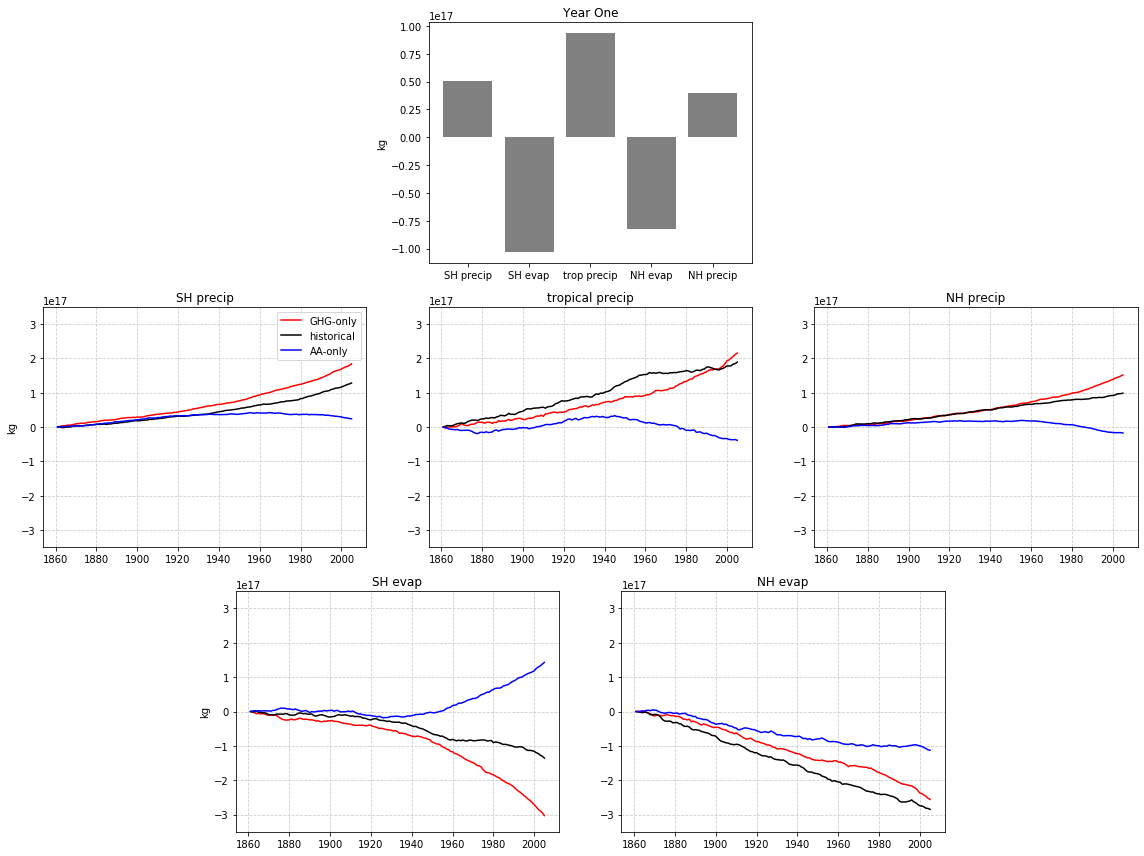

In [12]:
region_df_dict['BCC-CSM2-MR'] = plot_data(region_dict['BCC-CSM2-MR'], 'BCC-CSM2-MR')

**Figure.**  
Top panel: Annual region-integrated P-E for the first year of the historical experiment.  
Remaining panels: Cumulative region-integrated P-E anomaly for the GHG-only (red), AA-only (blue) and historical (black) experiments.

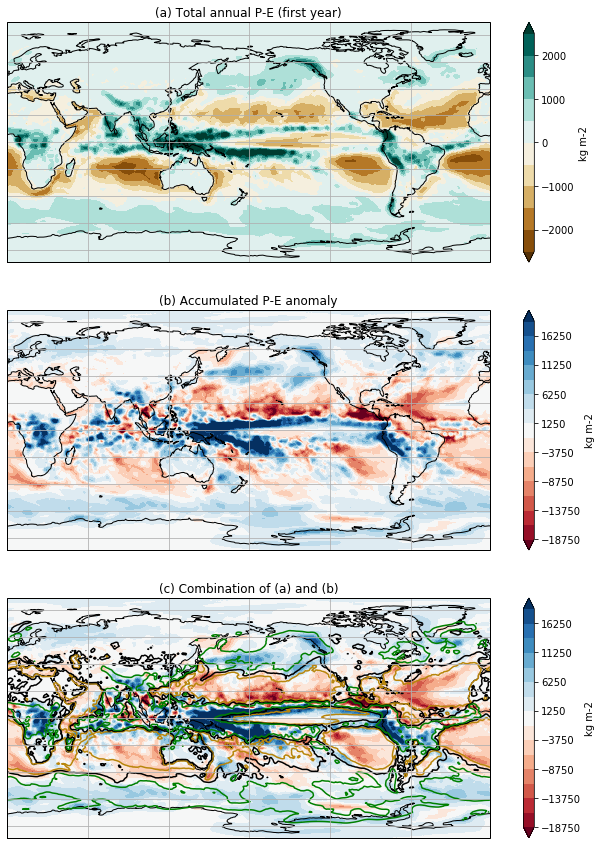

In [13]:
plot_spatial(spatial_dict[('BCC-CSM2-MR', 'historical')])

## CanESM5

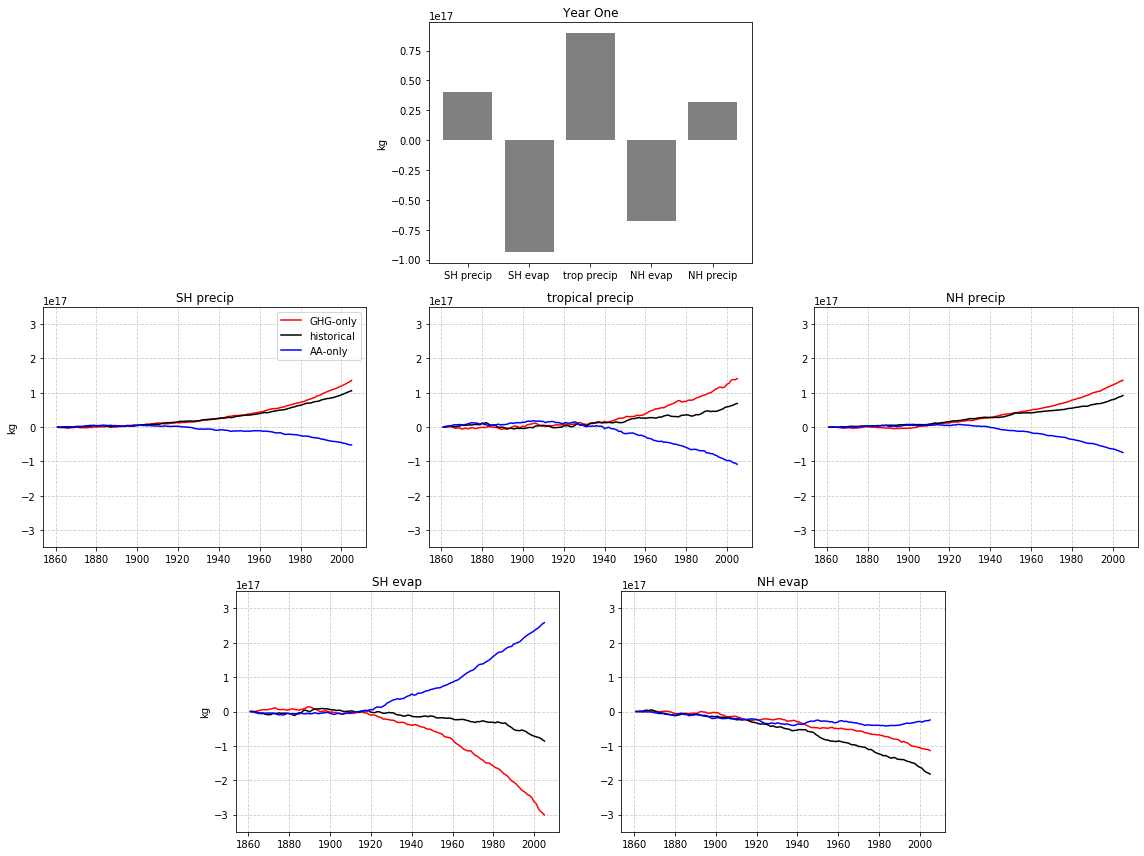

In [14]:
region_df_dict['CanESM5'] = plot_data(region_dict['CanESM5'], 'CanESM5')

## IPSL-CM6A-LR

In [15]:
#zonal_df_dict['IPSL-CM6A-LR'] = plot_data(zonal_dict['IPSL-CM6A-LR'], 'IPSL-CM6A-LR')

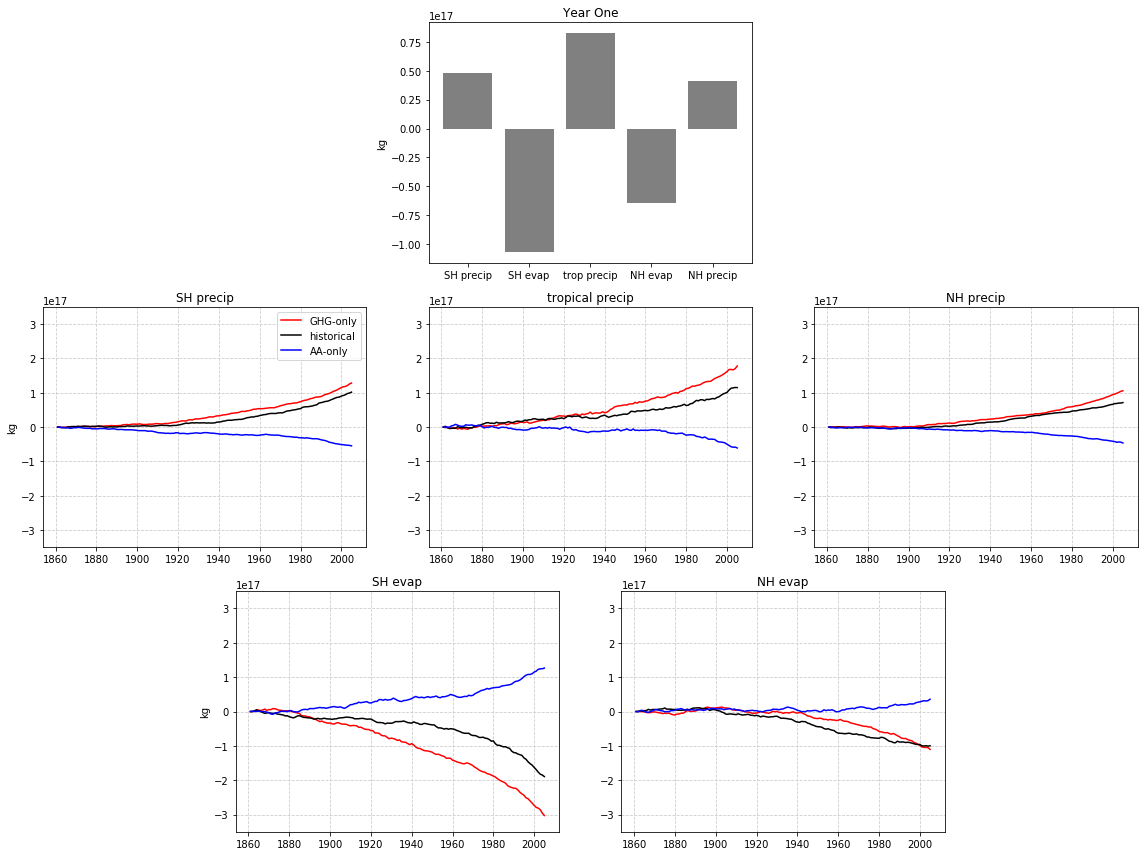

In [16]:
region_df_dict['IPSL-CM6A-LR'] = plot_data(region_dict['IPSL-CM6A-LR'],'IPSL-CM6A-LR')

## CanESM2

In [17]:
#zonal_df_dict['CanESM2'] = plot_data(zonal_dict['CanESM2'], 'CanESM2')

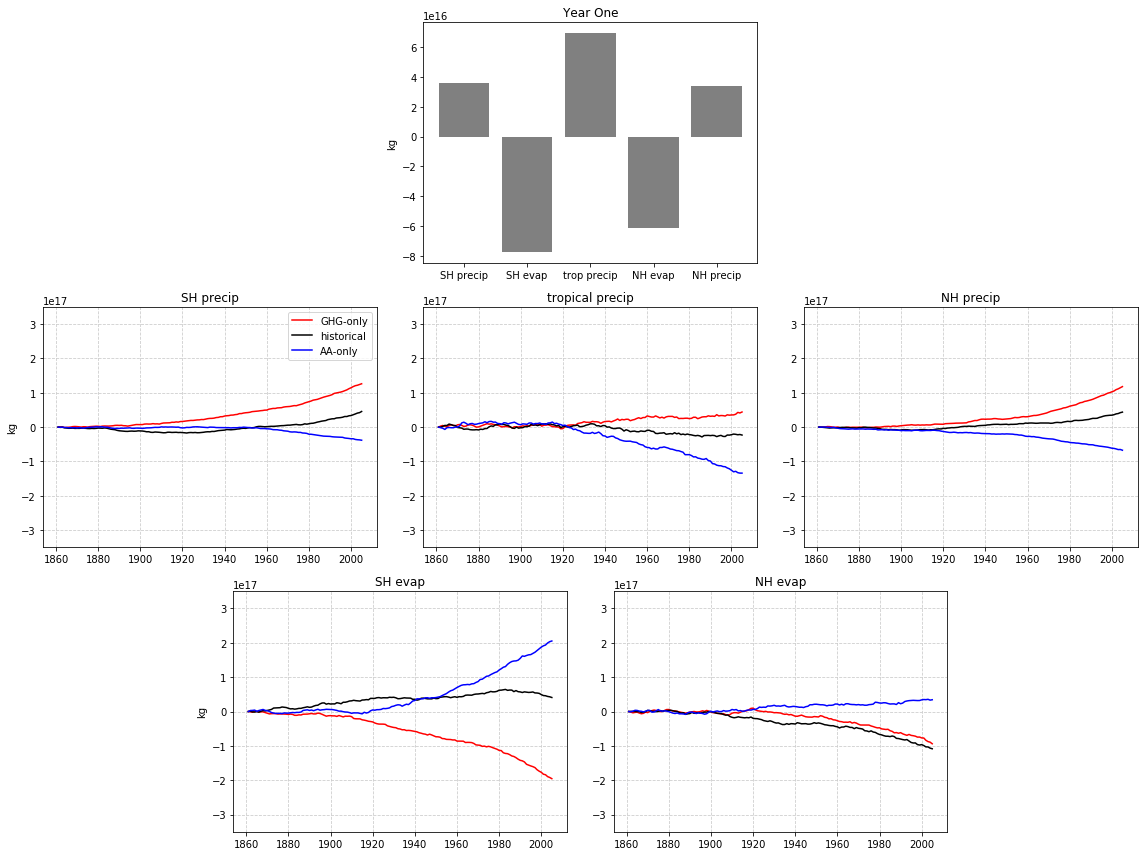

In [18]:
region_df_dict['CanESM2'] = plot_data(region_dict['CanESM2'], 'CanESM2')

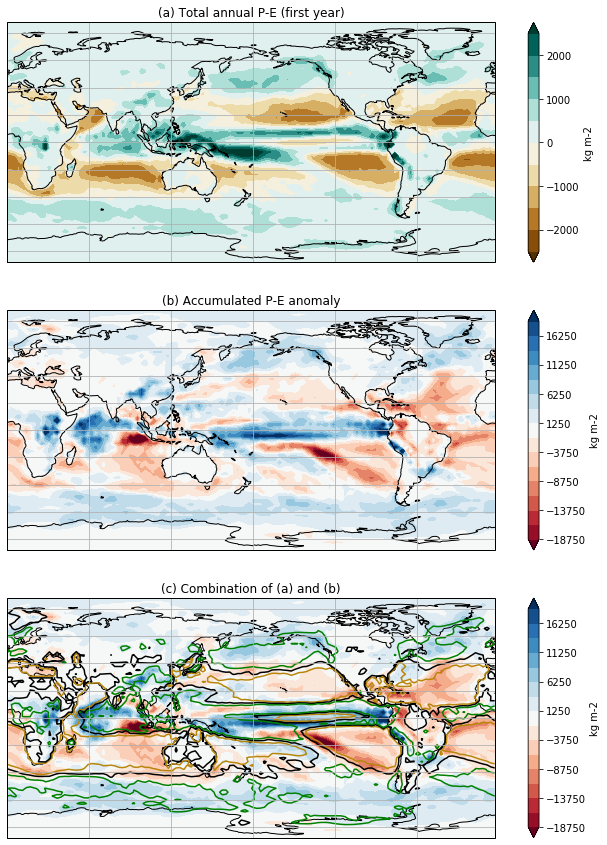

In [19]:
plot_spatial(spatial_dict[('CanESM2', 'historicalGHG')])

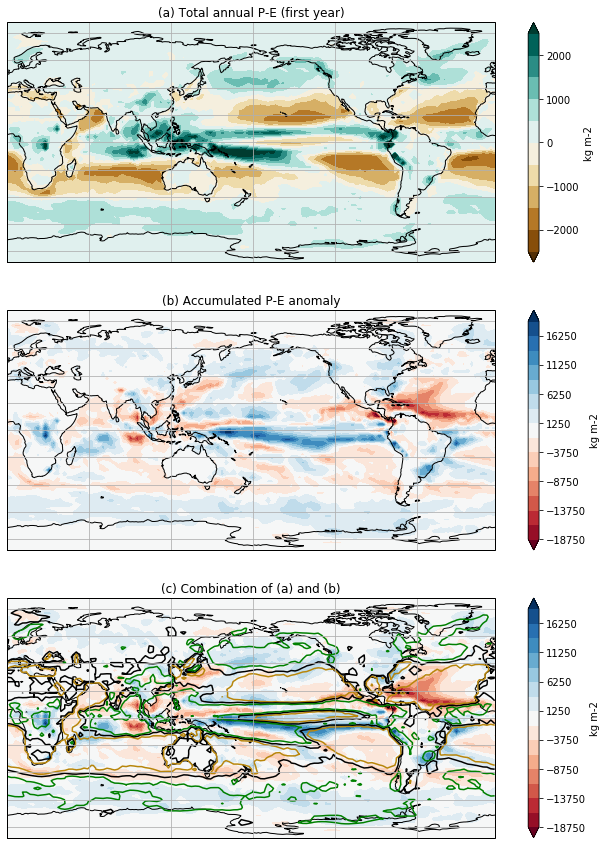

In [20]:
plot_spatial(spatial_dict[('CanESM2', 'historical')])

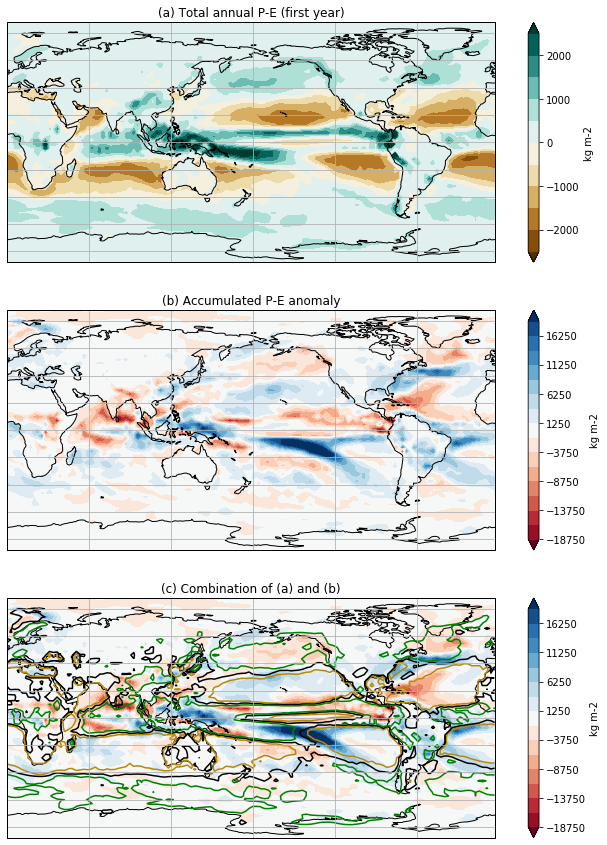

In [21]:
plot_spatial(spatial_dict[('CanESM2', 'historicalMisc')])

## FGOALS-g2

In [22]:
#zonal_df_dict['FGOALS-g2'] = plot_data(zonal_dict['FGOALS-g2'], 'FGOALS-g2')

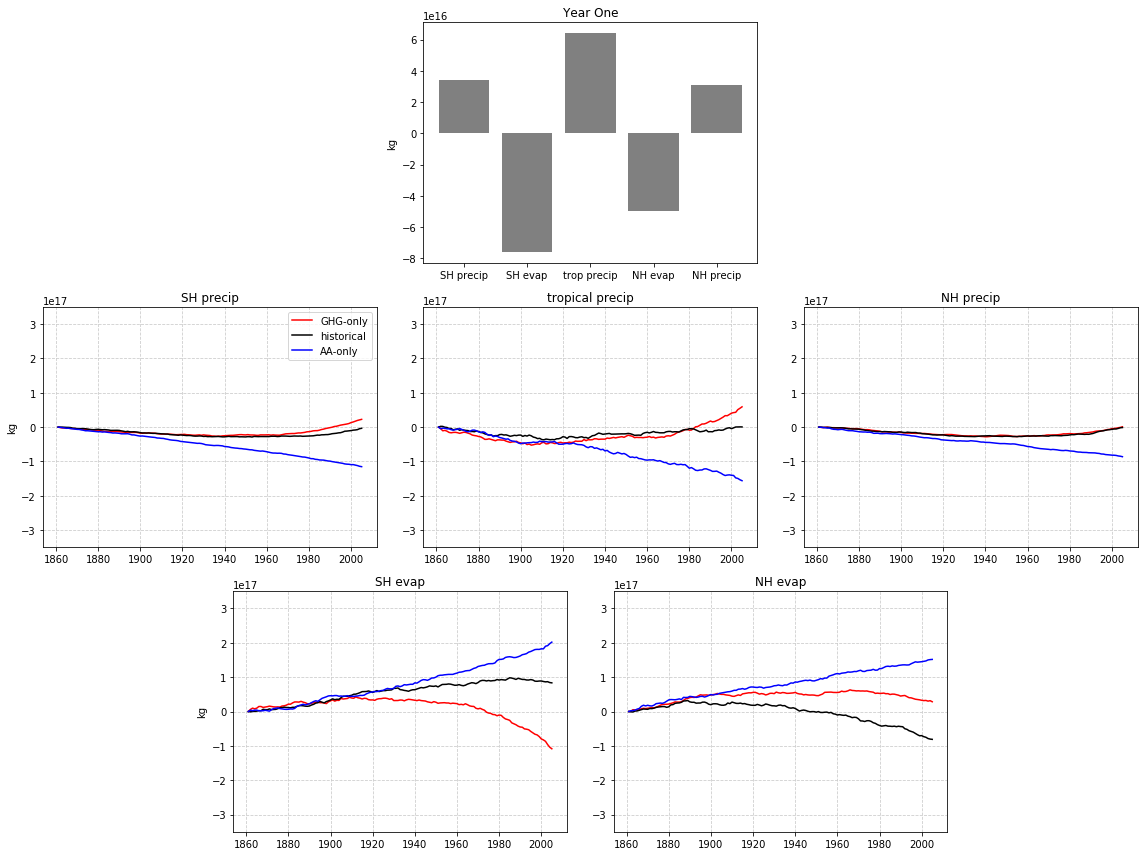

In [23]:
region_df_dict['FGOALS-g2'] = plot_data(region_dict['FGOALS-g2'], 'FGOALS-g2')

## GFDL-CM3

In [24]:
#zonal_df_dict['GFDL-CM3'] = plot_data(zonal_dict['GFDL-CM3'], 'GFDL-CM3')

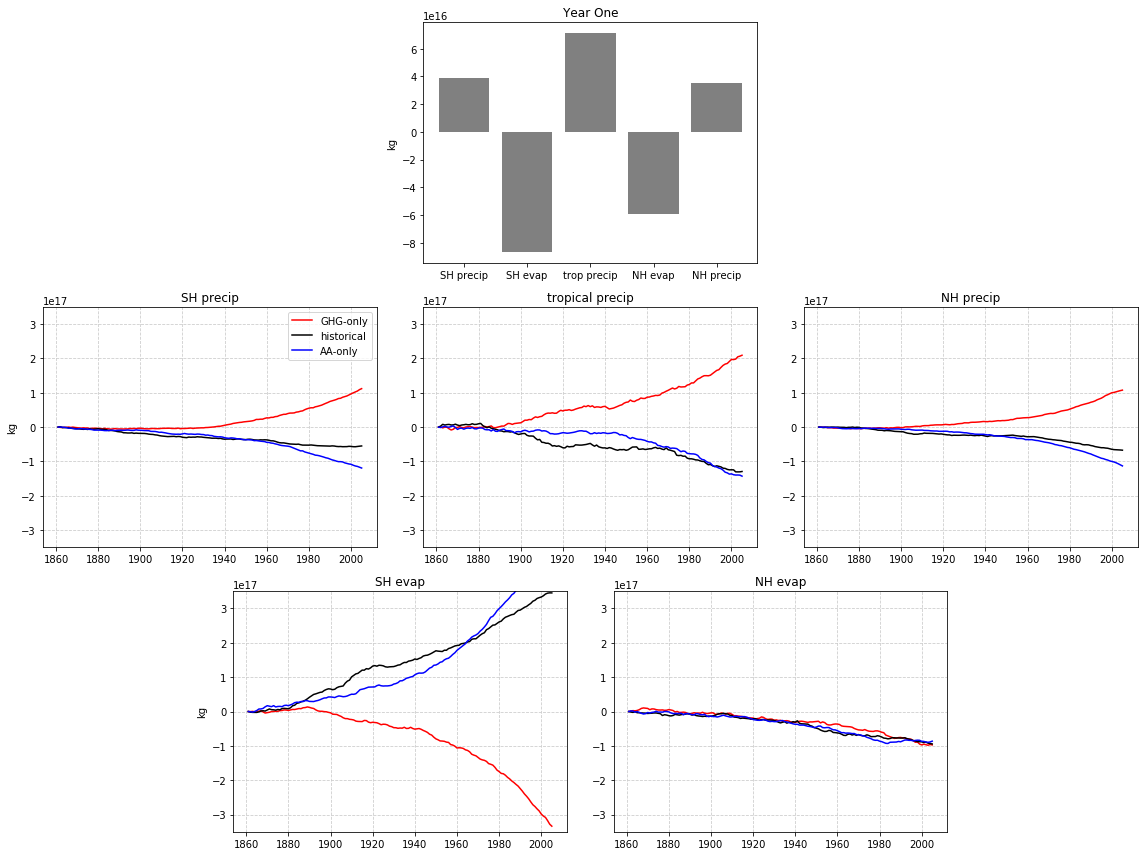

In [25]:
region_df_dict['GFDL-CM3'] = plot_data(region_dict['GFDL-CM3'], 'GFDL-CM3')

## GFDL-ESM2M

In [26]:
#zonal_df_dict['GFDL-ESM2M'] = plot_data(zonal_dict['GFDL-ESM2M'], 'GFDL-ESM2M')

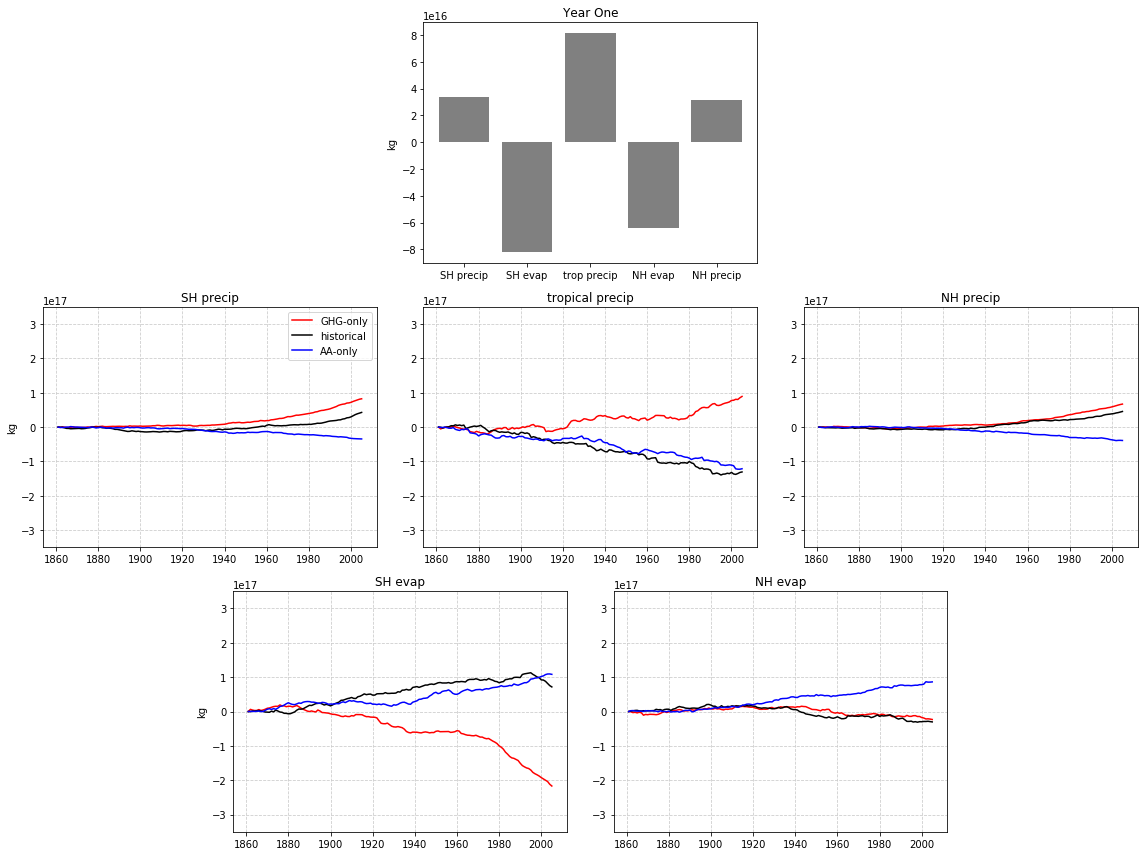

In [27]:
region_df_dict['GFDL-ESM2M'] = plot_data(region_dict['GFDL-ESM2M'], 'GFDL-ESM2M')

## GISS-E2-H

In [28]:
#zonal_df_dict['GISS-E2-H'] = plot_data(zonal_dict['GISS-E2-H'], 'GISS-E2-H')

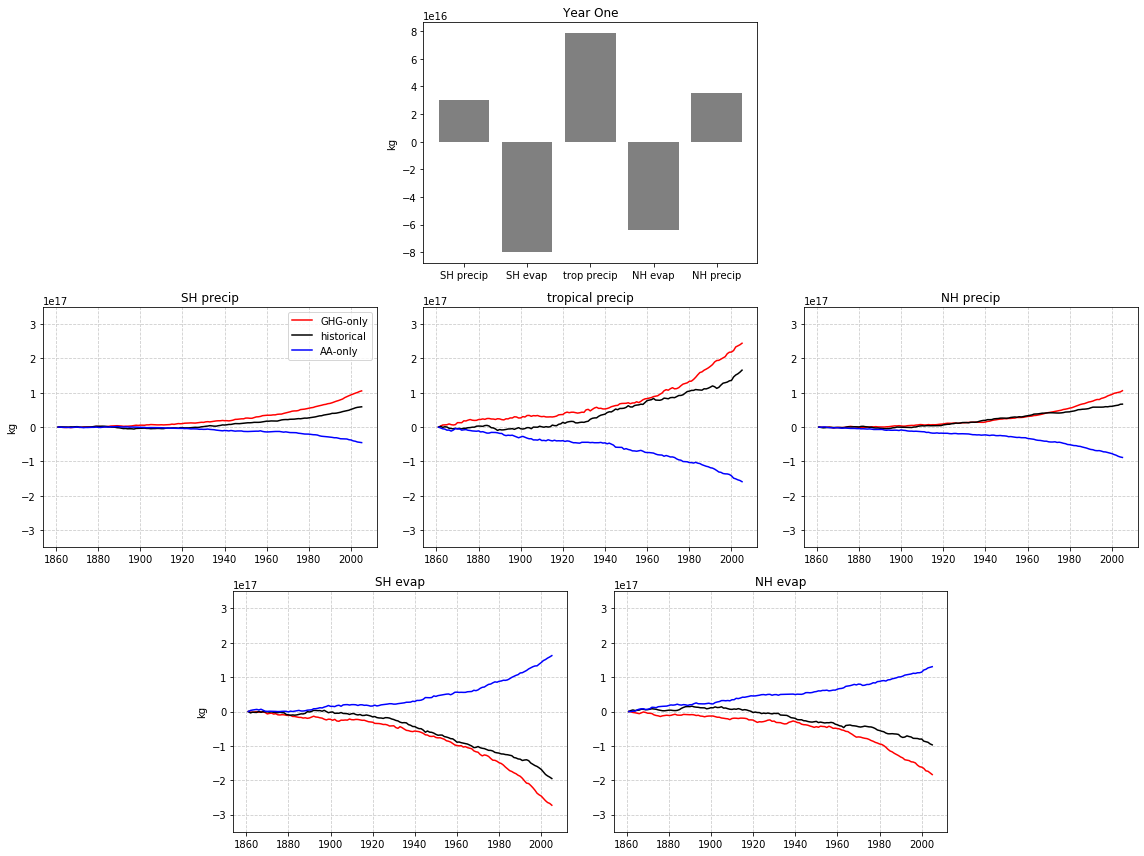

In [29]:
region_df_dict['GISS-E2-H'] = plot_data(region_dict['GISS-E2-H'], 'GISS-E2-H')

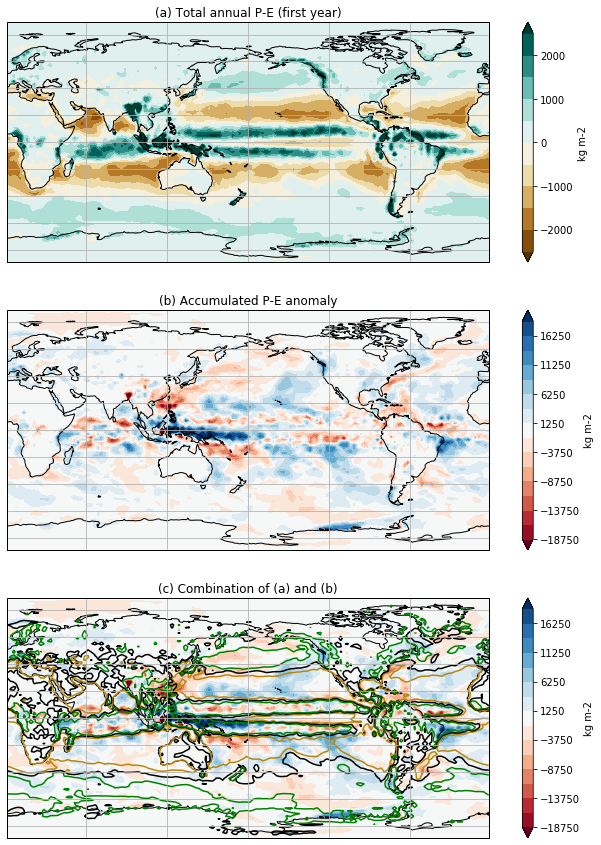

In [30]:
plot_spatial(spatial_dict[('GISS-E2-H', 'historicalMisc')])

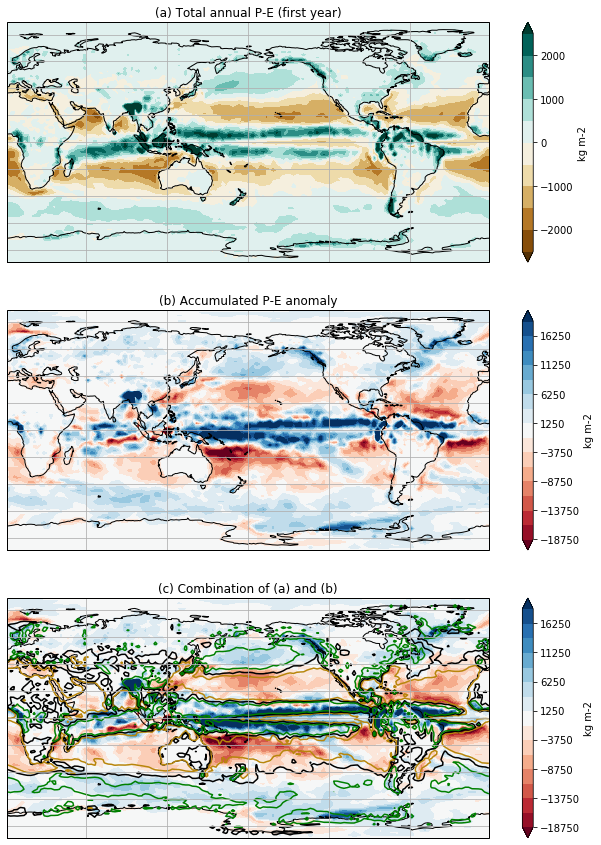

In [31]:
plot_spatial(spatial_dict[('GISS-E2-H', 'historicalGHG')])

## GISS-E2-R

In [32]:
#zonal_df_dict['GISS-E2-R'] = plot_data(zonal_dict['GISS-E2-R'], 'GISS-E2-R')

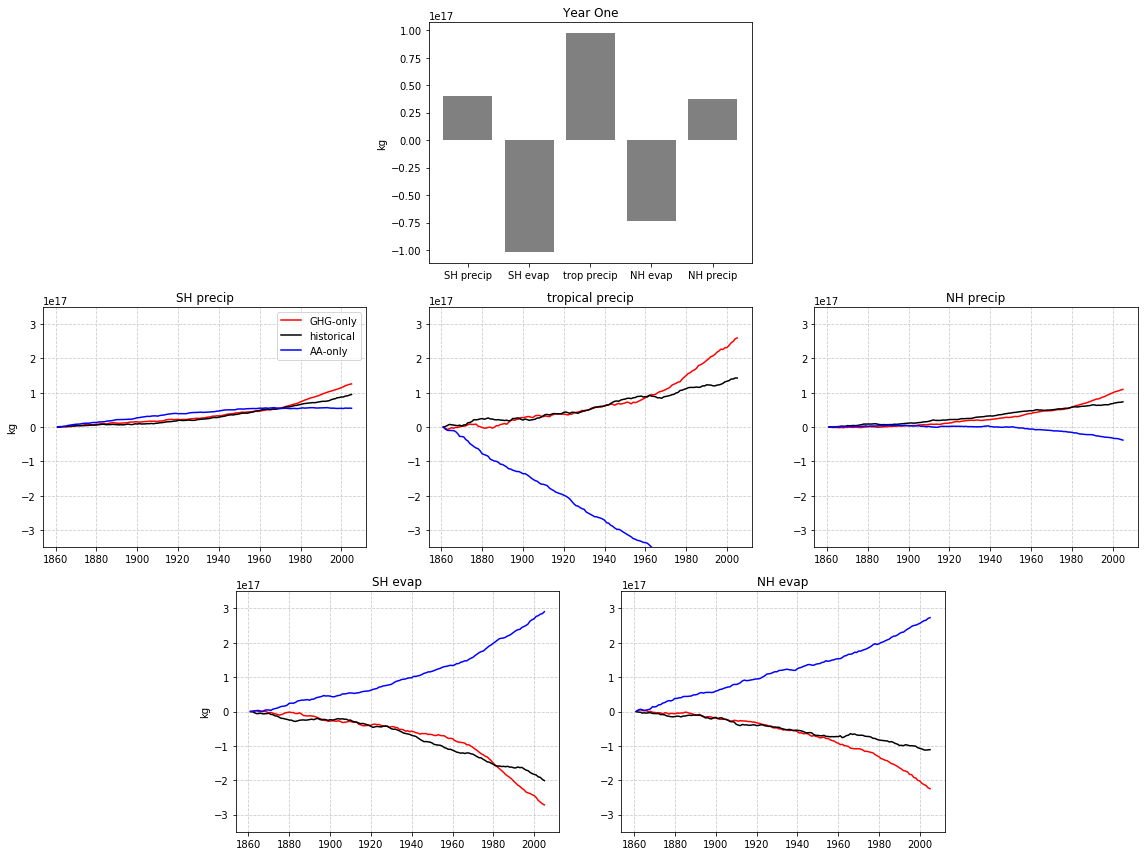

In [33]:
region_df_dict['GISS-E2-R'] = plot_data(region_dict['GISS-E2-R'], 'GISS-E2-R')

## IPSL-CM5A-LR

In [34]:
#zonal_df_dict['IPSL-CM5A-LR'] = plot_data(zonal_dict['IPSL-CM5A-LR'], 'IPSL-CM5A-LR')

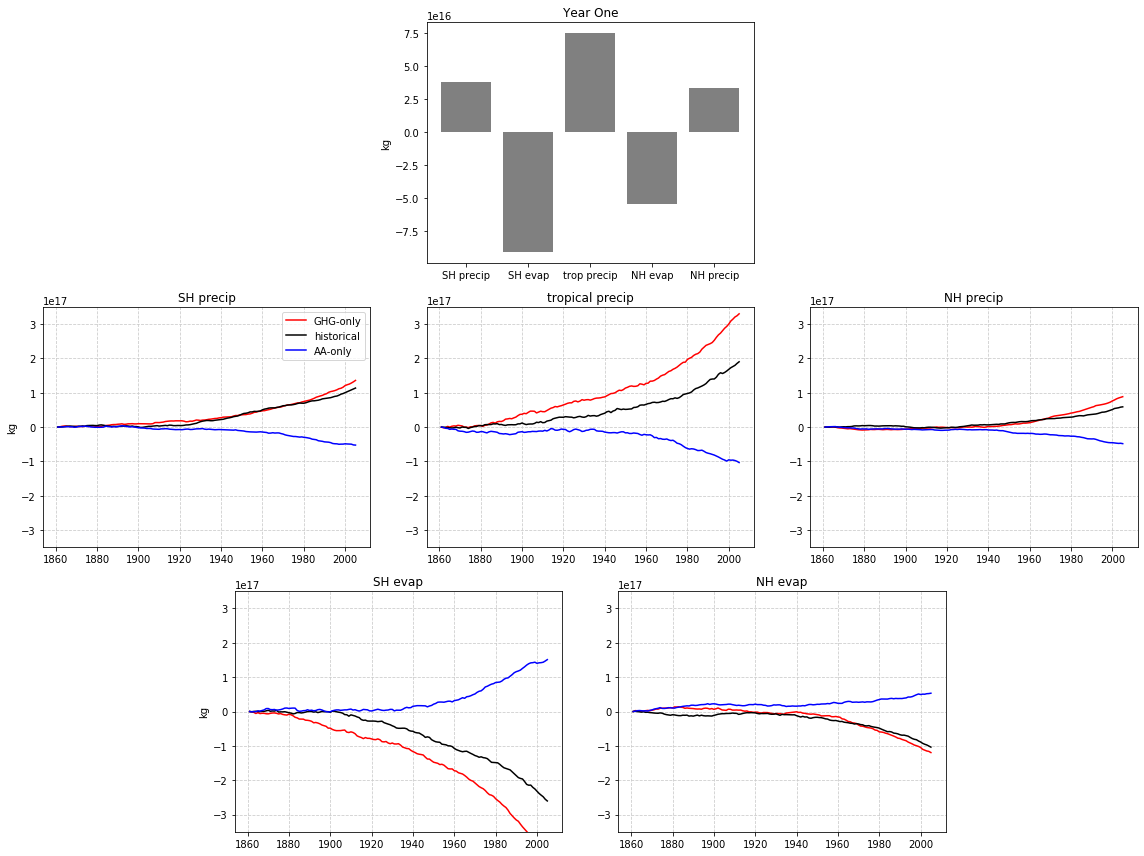

In [35]:
region_df_dict['IPSL-CM5A-LR'] = plot_data(region_dict['IPSL-CM5A-LR'], 'IPSL-CM5A-LR')

## NorESM1-M

In [36]:
#zonal_df_dict['NorESM1-M'] = plot_data(zonal_dict['NorESM1-M'], 'NorESM1-M')

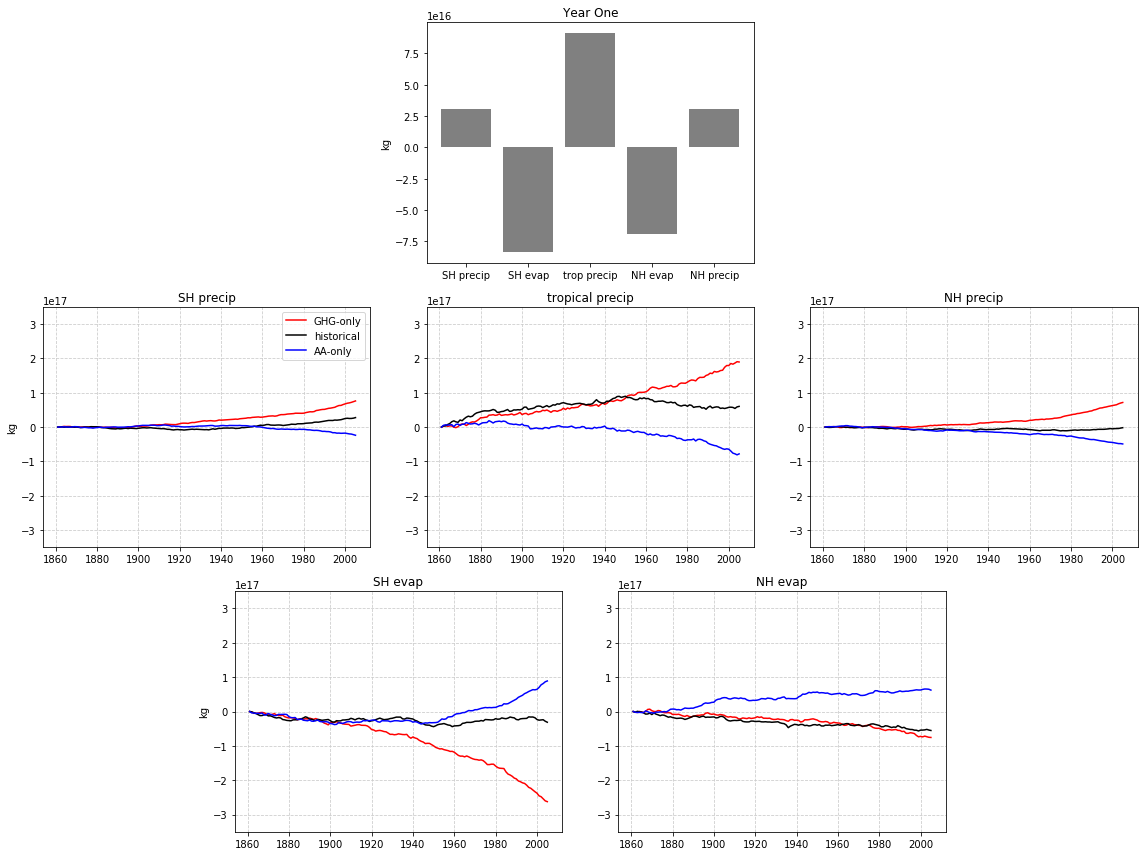

In [37]:
region_df_dict['NorESM1-M'] = plot_data(region_dict['NorESM1-M'], 'NorESM1-M')

## CCSM4

In [38]:
#zonal_df_dict['CCSM4'] = plot_data(zonal_dict['CCSM4'], 'CCSM4')

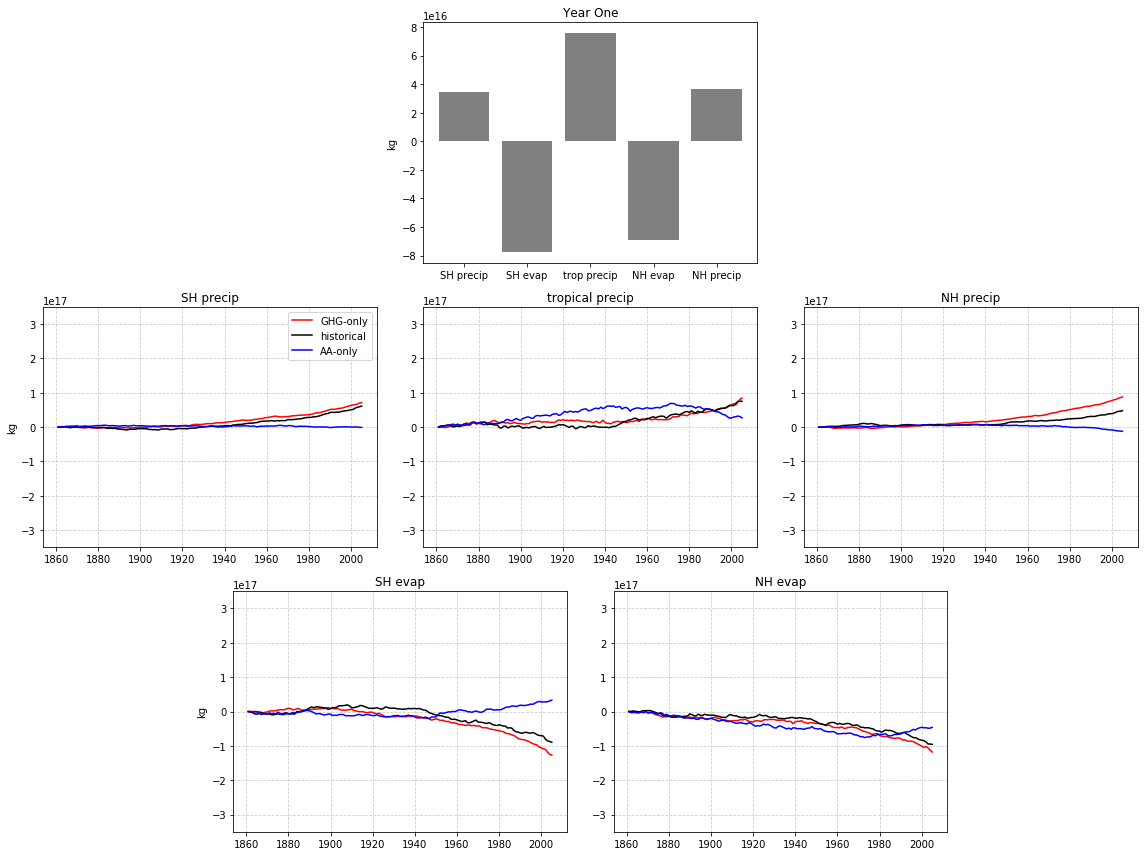

In [39]:
region_df_dict['CCSM4'] = plot_data(region_dict['CCSM4'], 'CCSM4')

## CSIRO-Mk3-6-0

In [40]:
#zonal_df_dict['CSIRO-Mk3-6-0'] = plot_data(zonal_dict['CSIRO-Mk3-6-0'], 'CSIRO-Mk3-6-0')

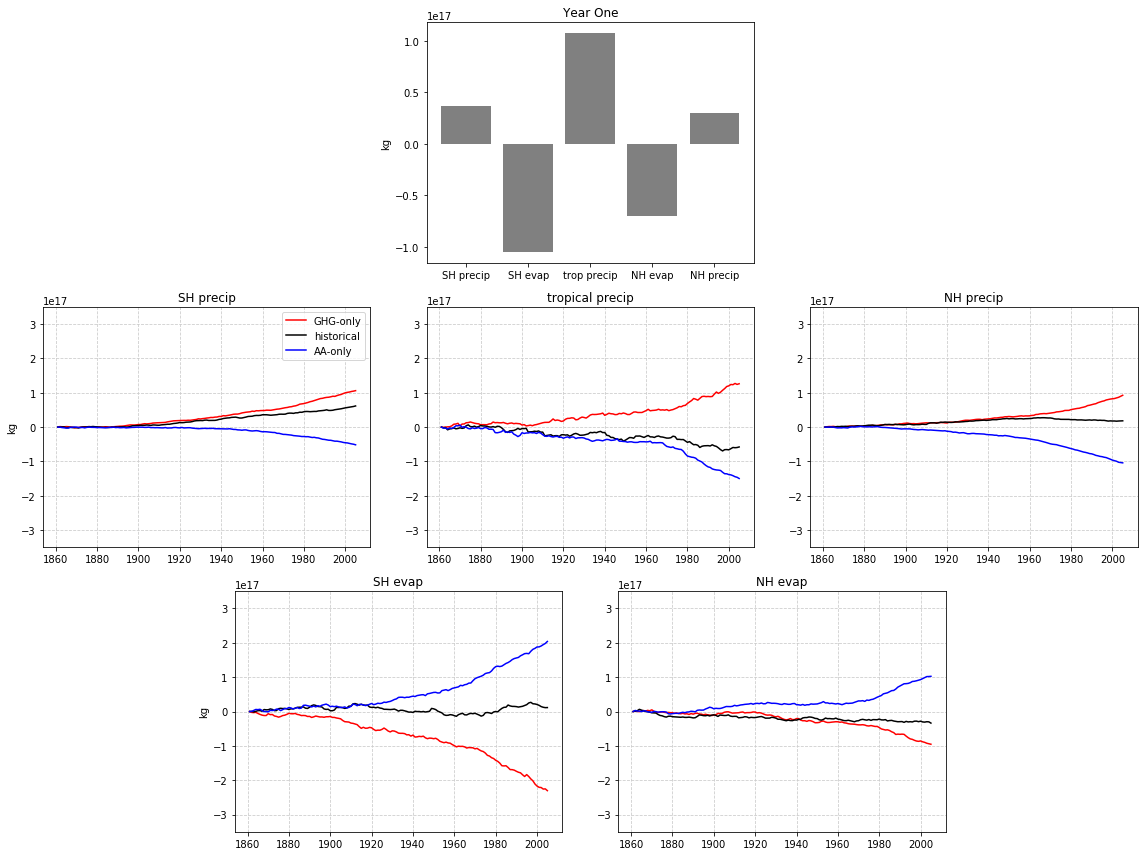

In [41]:
region_df_dict['CSIRO-Mk3-6-0'] = plot_data(region_dict['CSIRO-Mk3-6-0'], 'CSIRO-Mk3-6-0')

# Ensemble 

In [42]:
full_model_list = sorted(region_dict.keys())

In [43]:
def create_df(df_dict, model_list):
    """Create a dataframe for a list of models"""

    df = df_dict[model_list[0]]
    for model in model_list[1:]:
        df = df.append(df_dict[model], ignore_index=True)
    df['cumulative_change_sign_fix'] = df['cumulative_change'].where((df['region'] == 'SH precip') | (df['region'] == 'tropical precip') | (df['region'] == 'NH precip') | (df['region'] == 'globe precip'), df['cumulative_change'] * -1)
        
    return df

In [44]:
#zonal_df_full = create_df(zonal_df_dict, full_model_list)
region_df_full = create_df(region_df_dict, full_model_list)

In [45]:
region_df_full

model experiment           region         start  cumulative_change  \
0    BCC-CSM2-MR   GHG-only     globe precip  1.721687e+17       5.510117e+17   
1    BCC-CSM2-MR   GHG-only        SH precip  4.638993e+16       1.838308e+17   
2    BCC-CSM2-MR   GHG-only          SH evap -1.051330e+17      -3.028547e+17   
3    BCC-CSM2-MR   GHG-only  tropical precip  8.724134e+16       2.154482e+17   
4    BCC-CSM2-MR   GHG-only          NH evap -6.806930e+16      -2.555816e+17   
..           ...        ...              ...           ...                ...   
229    NorESM1-M    AA-only        SH precip  3.371167e+16      -2.371683e+16   
230    NorESM1-M    AA-only          SH evap -1.045048e+17       8.884649e+16   
231    NorESM1-M    AA-only  tropical precip  8.963709e+16      -7.790879e+16   
232    NorESM1-M    AA-only          NH evap -4.778786e+16       6.225092e+16   
233    NorESM1-M    AA-only        NH precip  2.877760e+16      -4.902221e+16   

     cumulative_change_anomaly  percentage_change  percentage_change_anomaly  \
0                          NaN           2.207185                        NaN   
1                 1.602220e+14           2.732917                   0.525733   
2                 1.191842e+17           1.986677                  -0.220507   
3                 3.177767e+16           1.703149                  -0.504036   
4                 7.191098e+16           2.589466                   0.382281   
..                         ...                ...                        ...   
229               2.649911e+16          -0.485186                   0.197766   
230              -3.863055e+16          -0.586322                   0.096630   
231              -2.769285e+16          -0.599419                   0.083533   
232              -1.203498e+16          -0.898380                  -0.215428   
233               1.193736e+15          -1.174817                  -0.491865   

     cumulative_change_sign_fix  
0                  5.510117e+17  
1                  1.838308e+17  
2                  3.028547e+17  
3                  2.154482e+17  
4                  2.555816e+17  
..                          ...  
229               -2.371683e+16  
230               -8.884649e+16  
231               -7.790879e+16  
232               -6.225092e+16  
233               -4.902221e+16  

[234 rows x 9 columns]

In [46]:
def plot_ensemble_distribution(df, yvar, ylim=None):
    """Plot the ensemble results"""
    
    if 'cumulative' in yvar:
        units = 'Accumulated P-E anomaly (kg)'
    elif 'percentage' in yvar:
        units = 'Change in P-E (%)'
    
    fig, ax = plt.subplots(1, 1, figsize=[12, 8])
    #sns.swarmplot(x="Region", y="Change", hue="Experiment",
    #              data=df, ax=axes, palette='hot')
    my_pal = {"GHG-only": "tab:red", "historical": "tab:gray", "AA-only":"tab:blue"}
    sns.boxplot(x="region", y=yvar, hue="experiment",
                data=df, ax=ax, palette=my_pal)
    ax.set_ylabel(units)
    ax.axhline(0, color='0.5', linestyle='--')
    if ylim:
        plt.ylim(ylim)
    plt.show()
    
    
def plot_ensemble_lines(df, model_list, experiment, anomaly=False):
    """Plot regional changes for each model as a line graph"""
    
    xvals = np.array([1, 2, 3, 4, 5])
    fig, axes = plt.subplots(1, 2, figsize=[18, 6])
    
    # cumulative change
    cum_change_var = 'cumulative_change_anomaly' if anomaly else 'cumulative_change_sign_fix'
    for model_num, model_name in enumerate(model_list):
        yvals = df[(df['model'] == model_name) & (df['experiment'] == experiment)][cum_change_var].values
        linestyle = '-' if model_num < 10 else '--'
        axes[0].plot(xvals, yvals, label=model_name, marker='o', linestyle=linestyle)
    axes[0].set_ylabel('Accumulated P-E anomaly (kg)')
    axes[0].set_xticks(xvals)
    axes[0].set_xticklabels(['SH precip', 'SH evap', 'trop precip', 'NH evap', 'NH precip'])
    axes[0].set_title(experiment)
    axes[0].axhline(0, color='0.8')
    if anomaly:
        axes[0].set_ylim(-2.5e17, 2.5e17)

    # percentage change
    pct_change_var = 'percentage_change_anomaly' if anomaly else 'percentage_change'
    for model_num, model_name in enumerate(model_list):
        yvals = df[(df['model'] == model_name) & (df['experiment'] == experiment)][pct_change_var].values
        linestyle = '-' if model_num < 10 else '--'
        axes[1].plot(xvals, yvals, label=model_name, marker='o', linestyle=linestyle)
    axes[1].set_ylabel('Change in P-E (%)')
    axes[1].set_xticks(xvals)
    axes[1].set_xticklabels(['SH precip', 'SH evap', 'trop precip', 'NH evap', 'NH precip'])
    axes[1].set_title(experiment)
    axes[1].axhline(0, color='0.8')
    if anomaly:
        axes[1].set_ylim(-2, 2)
    
    #box = axes[1].get_position()
    #axes[1].set_position([box.x0, box.y0, box.width * 0.8, box.height])
    #axes[0].legend(loc='center left', bbox_to_anchor=(1, 0.5))
    axes[0].legend()

    plt.show()

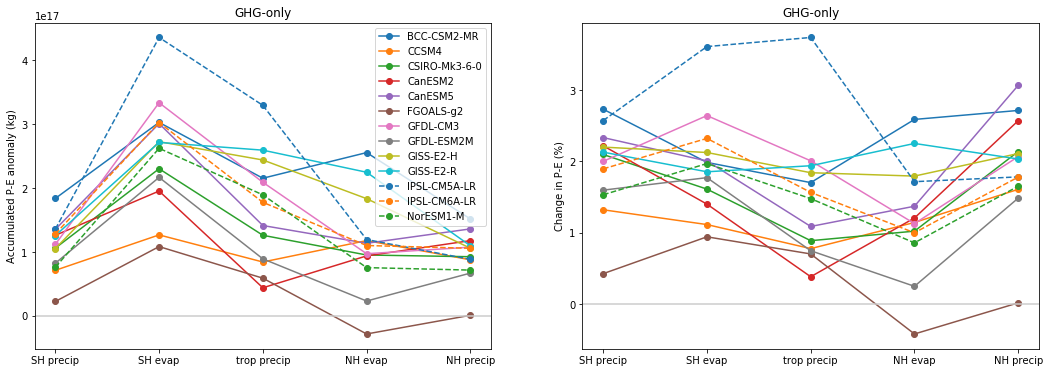

In [47]:
plot_ensemble_lines(region_df_full.dropna(), full_model_list, 'GHG-only')

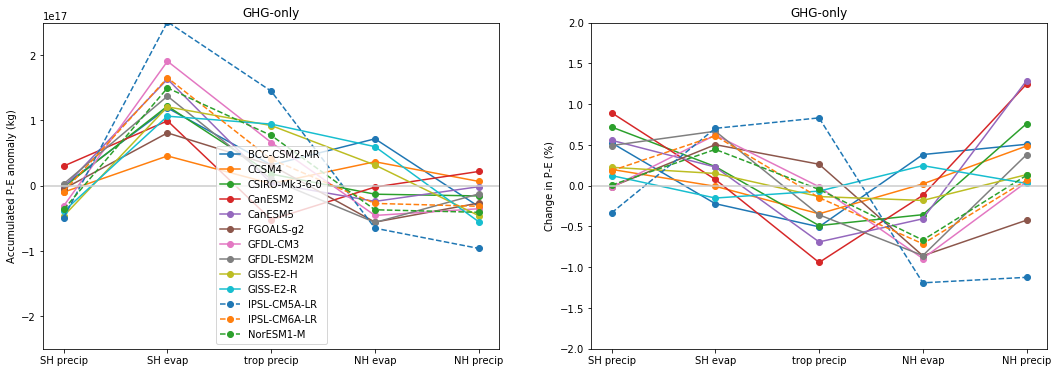

In [48]:
plot_ensemble_lines(region_df_full.dropna(), full_model_list, 'GHG-only', anomaly=True)

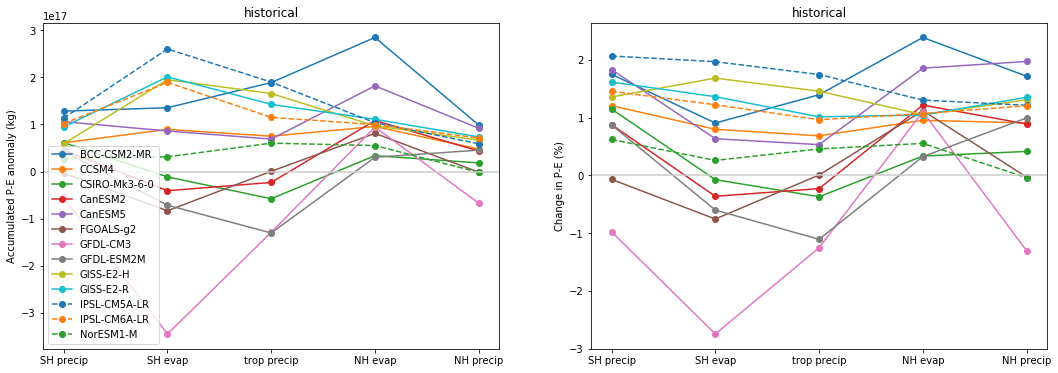

In [49]:
plot_ensemble_lines(region_df_full.dropna(), full_model_list, 'historical')

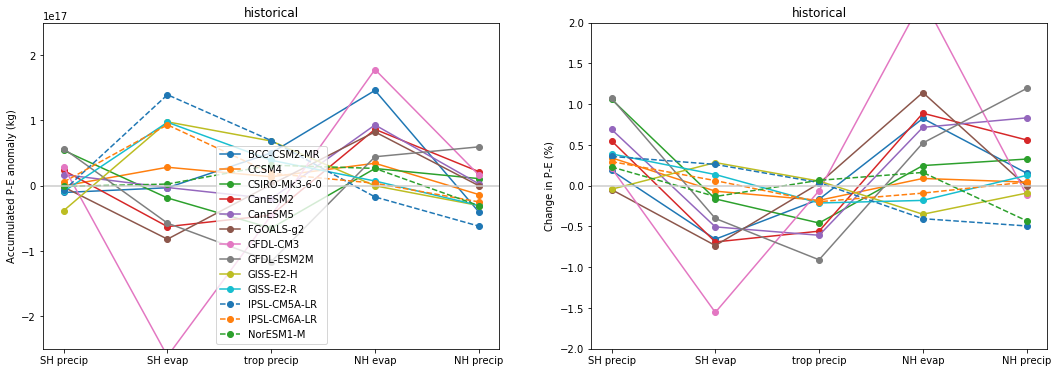

In [50]:
plot_ensemble_lines(region_df_full.dropna(), full_model_list, 'historical', anomaly=True)

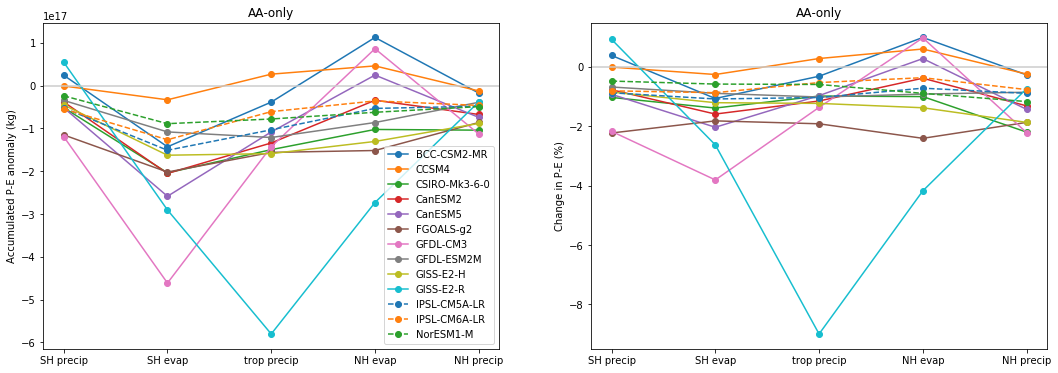

In [51]:
plot_ensemble_lines(region_df_full.dropna(), full_model_list, 'AA-only')

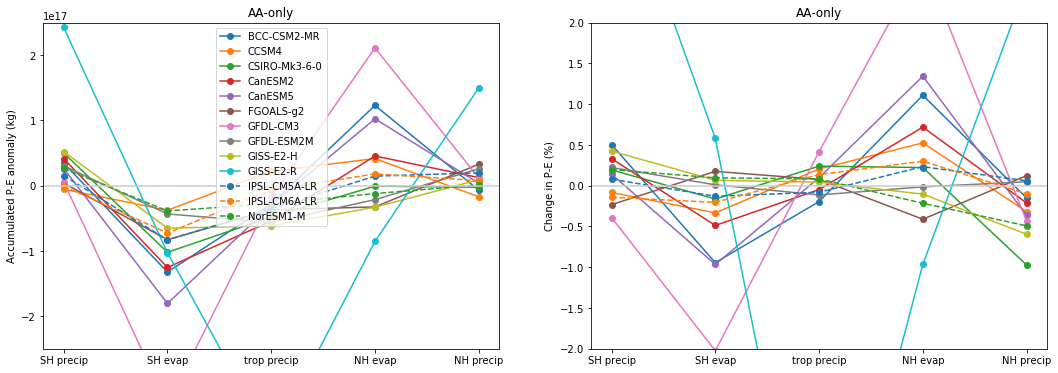

In [52]:
plot_ensemble_lines(region_df_full.dropna(), full_model_list, 'AA-only', anomaly=True)

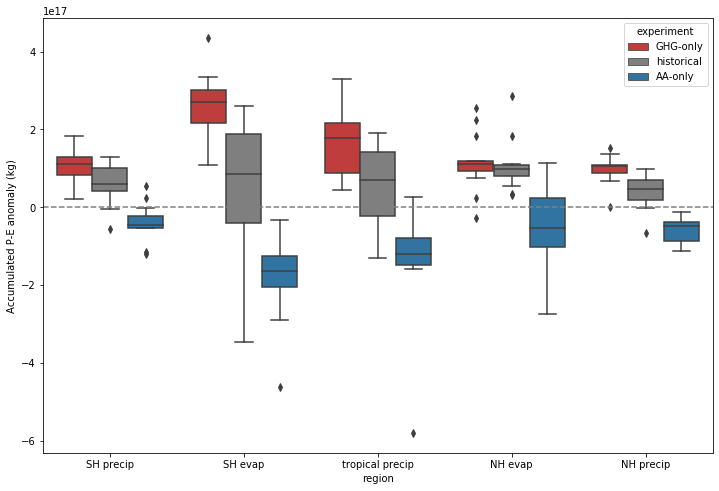

In [53]:
plot_ensemble_distribution(region_df_full.dropna(), 'cumulative_change_sign_fix')

**Figure.** Accumulated P-E anomaly over the period 1861-2005. Each box shows the ensemble quartiles, while the whiskers extend to show the rest of the distribution, except for points determined to be outliers using a method that is a function of the inter-quartile range. Positive values indicate an increase in precipitation in the precipitation dominated regions and an increase in evaporation in the evaporation dominated regions (i.e. evaporative regions have been multiplied by -1). 

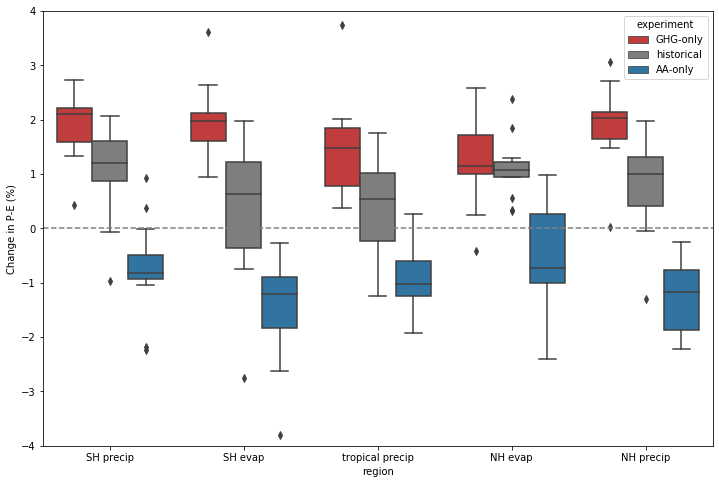

In [174]:
plot_ensemble_distribution(region_df_full.dropna(), 'percentage_change', ylim=[-4, 4])

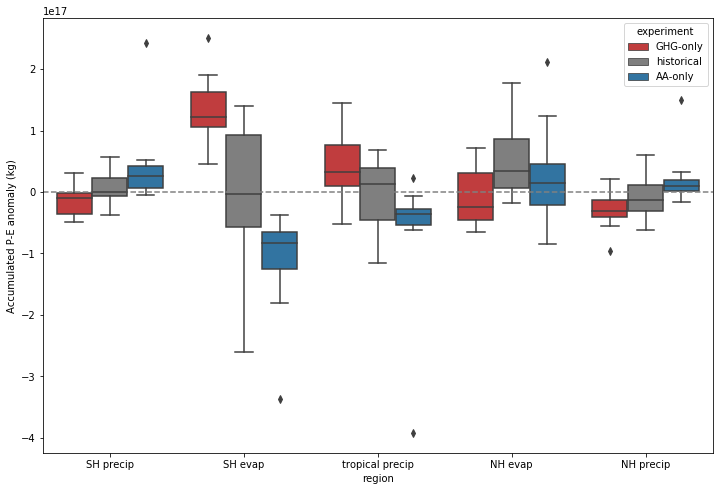

In [54]:
plot_ensemble_distribution(region_df_full.dropna(), 'cumulative_change_anomaly')

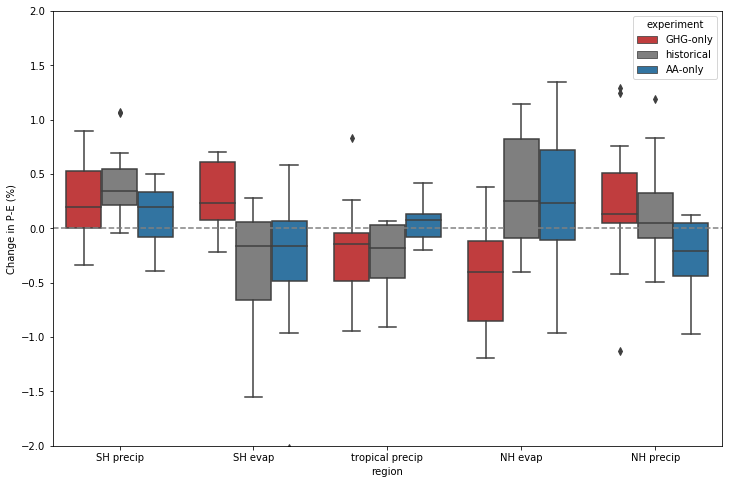

In [175]:
plot_ensemble_distribution(region_df_full.dropna(), 'percentage_change_anomaly', ylim=[-2, 2])

**Figure.** Percentage change in P-E over the period 1861-2005. Each box shows the ensemble quartiles, while the whiskers extend to show the rest of the distribution, except for points determined to be outliers using a method that is a function of the inter-quartile range.

In [49]:
for model in full_model_list:
    for experiment in ['historical', 'GHG-only', 'AA-only']:
        evap = region_df_full[(region_df_full['model'] == model) & (region_df_full['experiment'] == experiment)]['cumulative_change'].values[1::2].sum()
        precip = region_df_full[(region_df_full['model'] == model) & (region_df_full['experiment'] == experiment)]['cumulative_change'].values[0::2].sum()
        nonclosure_pct = (abs(precip + evap) / max(abs(evap), abs(precip))) * 100
        print(f"{model}, {experiment}: {nonclosure_pct}%")
        

BCC-CSM2-MR, historical: 1.0286112783261487%
BCC-CSM2-MR, GHG-only: 1.3295273124607785%
BCC-CSM2-MR, AA-only: 3.7005615072380023%
CCSM4, historical: 0.8091969668056112%
CCSM4, GHG-only: 0.5099184223544908%
CCSM4, AA-only: 4.806997916737933%
CSIRO-Mk3-6-0, historical: 1.351425664291241%
CSIRO-Mk3-6-0, GHG-only: 0.24475444741830338%
CSIRO-Mk3-6-0, AA-only: 0.33464164471271773%
CanESM2, historical: 2.6943246162480534%
CanESM2, GHG-only: 0.4974830286893692%
CanESM2, AA-only: 0.012023214184809733%
CanESM5, historical: 0.5657169364466254%
CanESM5, GHG-only: 0.41117223947805304%
CanESM5, AA-only: 0.02159016338606466%
FGOALS-g2, historical: 46.58123810531913%
FGOALS-g2, GHG-only: 2.7871902404492013%
FGOALS-g2, AA-only: 1.0530162792036282%
GFDL-CM3, historical: 0.24007348044066742%
GFDL-CM3, GHG-only: 0.550627889786083%
GFDL-CM3, AA-only: 0.04881107879435761%
GFDL-ESM2M, historical: 2.6480265043068574%
GFDL-ESM2M, GHG-only: 0.612766383960003%
GFDL-ESM2M, AA-only: 0.1578859499999672%
GISS-E2-H, 

## Summary

GHG-only experiment:
- The precipitative and evaporative regions all increase in intensity
- The percentage increase in precipitation is greater in the high latitudes than the tropics
- The percentage increase in evaporation is greater in the SH

AA-only experiment:
- The precipitative and evaporative regions all decrease in intensity (except in a few cases where Northern Hemisphere evaporation increases)
- The percentage decrease in precipitation is slightly greater in northern (versus southern) high latitudes
- The percentage decrease in evaporation is greater in the Southern Hemisphere

historical experiment:
- The precipitative and evaporative regions mostly increase in intensity (all do for NH evaporation)
- The percentage increase in precipitation is greater in the high latitudes than the tropics (the GHG influence) and marginally more so in the southern high latitudes (the AA influence)
- The percentage increase in evaporation is greater in the NH (GHGs cancelled strongly by AAs in SH; GHGs not opposed much at all by AAs in NH)???


Possible explanations:
- The fast precipitation response to GHGs (which acts to decrease precipitation) is more influential in the tropics
- Evaporation resposes are more sensitive in the Southern Hemisphere because there's more ocean relative to land?